<a href="https://colab.research.google.com/github/andreneox/cyclistic_data_analysis/blob/main/Rental_Bicycle_Analysis_for_Cyclistic_in_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cyclistic Study Case**

Em 2016, a Cyclistic lançou uma oferta bem-sucedida de compartilhamento de bicicletas. Desde então, o programa cresceu para uma frota de 5.824 bicicletas com rastreamento geográfico e bloqueio dentro de uma rede de 692 estações em Chicago. As bicicletas podem ser desbloqueadas em uma estação e devolvidas em qualquer outra estação do sistema a qualquer momento.

Até agora, a estratégia de marketing da Cyclistic baseava-se na conscientização geral e no apelo a amplos segmentos de consumidores. Uma abordagem que ajudou a tornar essas coisas possíveis foi a flexibilidade de seus planos de preços: passes de viagem única, passes de dia inteiro e planos anuais. Os clientes que adquirem passes de viagem única ou de dia inteiro são chamados de passageiros casuais. Os clientes que adquirem planos anuais são membros Cyclistic.

Os analistas financeiros da Cyclistic concluíram que os membros anuais são muito mais lucrativos do que os passageiros casuais. Embora a flexibilidade de preços ajude a Cyclistic a atrair mais clientes, Lily Moreno acredita que maximizar o número de membros anuais será a chave para o crescimento futuro. Em vez de criar uma campanha de marketing voltada para novos clientes, ela acredita que há uma boa chance de converter passageiros casuais em membros. Ela observa que os ciclistas casuais já estão cientes do programa Cyclistic e escolheram a Cyclistic para suas necessidades de mobilidade.




## **Cyclistic Stydy Case Objective**

A Lily estabeleceu um objetivo claro: criar estratégias de marketing destinadas a converter passageiros casuais em membros anuais. Para fazer isso, no entanto, a equipe de analistas de marketing precisa entender melhor como os membros anuais e os passageiros casuais diferem, por que os passageiros casuais iriam querer adquirir um plano e como a mídia digital poderia afetar suas táticas de marketing. A Lily e sua equipe estão interessados em analisar os dados históricos de trajetos de bicicleta da Cyclistic para identificar tendências.

## Questionamentos

1.	Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
2.	Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?
3.	Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?


# **Encontrando, validando e tratando dados (Processing)**

### **Importando as bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content'

### **Obtendo os dados**

In [4]:
data_202301 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202301-divvy-tripdata.csv', sep=',', encoding='latin')
data_202302 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202302-divvy-tripdata.csv', sep=',', encoding='latin')
data_202303 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202303-divvy-tripdata.csv', sep=',', encoding='latin')
data_202304 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202304-divvy-tripdata.csv', sep=',', encoding='latin')
data_202305 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202305-divvy-tripdata.csv', sep=',', encoding='latin')
data_202306 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202306-divvy-tripdata.csv', sep=',', encoding='latin')
data_202307 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202307-divvy-tripdata.csv', sep=',', encoding='latin')
data_202308 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202308-divvy-tripdata.csv', sep=',', encoding='latin')
data_202309 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202309-divvy-tripdata.csv', sep=',', encoding='latin')
data_202310 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202310-divvy-tripdata.csv', sep=',', encoding='latin')
data_202311 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202311-divvy-tripdata.csv', sep=',', encoding='latin')
data_202312 = pd.read_csv('/content/drive/MyDrive/2023_bicycle_data/202312-divvy-tripdata.csv', sep=',', encoding='latin')

In [5]:
data_202301.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


### **Unindo a base de dados**

In [6]:
data_2023_result = pd.concat([data_202301, data_202302, data_202303, data_202304, data_202305, data_202306, data_202307, data_202308, data_202309, data_202310, data_202311, data_202312])
data_2023_result

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
224071,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual


###**Tratando os dados**

Ordenando a coluna started_at em ordem ascendente

In [7]:
data_2023_result.sort_values(by = "started_at", ascending = True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
80659,53F0F248F28485D2,electric_bike,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,casual
189816,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,-87.618617,member
185198,E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,-87.661198,casual
106410,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,-87.659660,casual
169407,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,-87.666036,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222564,6FB217B8B8152D9B,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,41.891847,-87.620580,member
178730,8AD57B777CDD8F65,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886146,-87.624730,41.890000,-87.620000,casual
179852,0E2173686F7778E5,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886145,-87.624771,41.890000,-87.620000,member
119377,E3ADFD6C7743E816,electric_bike,2023-12-31 23:58:55,2024-01-01 00:06:08,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Sheridan Rd & Montrose Ave,TA1307000107,41.961456,-87.676323,41.961670,-87.654640,casual


Verificando os tipos de dados

In [8]:
df_type = pd.concat([data_2023_result.iloc[0], data_2023_result.dtypes], axis=1, join='inner')
df_type.columns = ['value', 'type']
df_type

,value,type
ride_id,F96D5A74A3E41399,object
rideable_type,electric_bike,object
started_at,2023-01-21 20:05:42,object
ended_at,2023-01-21 20:16:33,object
start_station_name,Lincoln Ave & Fullerton Ave,object
start_station_id,TA1309000058,object
end_station_name,Hampden Ct & Diversey Ave,object
end_station_id,202480.0,object
start_lat,41.924074,float64
start_lng,-87.646278,float64


Transformando as colunas started_at e ended_at que estao em object em datetime

In [9]:
data_2023_result['started_at'] = pd.to_datetime(data_2023_result['started_at'])
data_2023_result['ended_at'] = pd.to_datetime(data_2023_result['ended_at'])



Verificando valores vazios nas colunas

In [10]:
# Verificando a presença de células vazias em cada coluna
celulas_vazias = data_2023_result.isnull().sum()

# Exibindo o número de células vazias em cada coluna
print(celulas_vazias)


ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64


Limpeza das linhas com colunas onde há informações vazias

In [11]:
# Lista das colunas que você deseja verificar para células vazias
colunas_para_verificar = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng']

# Eliminando linhas que têm células vazias em qualquer uma das colunas especificadas
data_2023_result = data_2023_result.dropna(subset=colunas_para_verificar)

# Verificando se ainda existem células vazias nessas colunas após a limpeza
celulas_vazias_apos_limpeza = data_2023_result[colunas_para_verificar].isnull().sum()

print(celulas_vazias_apos_limpeza)


start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
end_lat               0
end_lng               0
dtype: int64


Mostrando a tabela atualmente

In [12]:
data_2023_result.sort_values(by = "started_at", ascending = True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
189816,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,-87.618617,member
185198,E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,-87.661198,casual
106410,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,-87.659660,casual
169407,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,-87.666036,member
18323,F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,41.884621,-87.627834,41.867888,-87.623041,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153555,3FA19D78E7B8E04C,classic_bike,2023-12-31 23:53:14,2023-12-31 23:56:48,Clinton St & Madison St,TA1305000032,Franklin St & Lake St,TA1307000111,41.882752,-87.641190,41.885837,-87.635500,member
7127,0A91A095DFF212FF,electric_bike,2023-12-31 23:53:18,2023-12-31 23:57:57,LaSalle St & Jackson Blvd,TA1309000004,Clark St & Randolph St,TA1305000030,41.878015,-87.631652,41.884576,-87.631890,member
164055,722B56B75AE5844C,electric_bike,2023-12-31 23:53:47,2023-12-31 23:55:54,Michigan Ave & Lake St,TA1305000011,Michigan Ave & Lake St,TA1305000011,41.886258,-87.624602,41.886022,-87.624398,member
222564,6FB217B8B8152D9B,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,41.891847,-87.620580,member


Criando uma cópia original do dataframe

In [13]:
data_2023_result = data_2023_result.copy()


Criando coluna para duração de passeio chamado duration_ride

In [14]:
data_2023_result.loc[:, 'duration_ride'] = data_2023_result['ended_at'] - data_2023_result['started_at']


Criando coluna para dia da semana chamado day_week

In [15]:
data_2023_result.loc[:, 'day_week'] = data_2023_result['started_at'].dt.day_name()



## **Analisando os dados (Analyzing)**

### Encontrando insights para analise de dados



Tempo Médio de Passeio para Membros e Casual (em minutos) em todo o ano de 2023.

Tempo Médio de Passeio em Minutos e Segundos:
member_casual
casual    22min 56s
member     12min 7s
Name: duration_ride_minutos, dtype: object


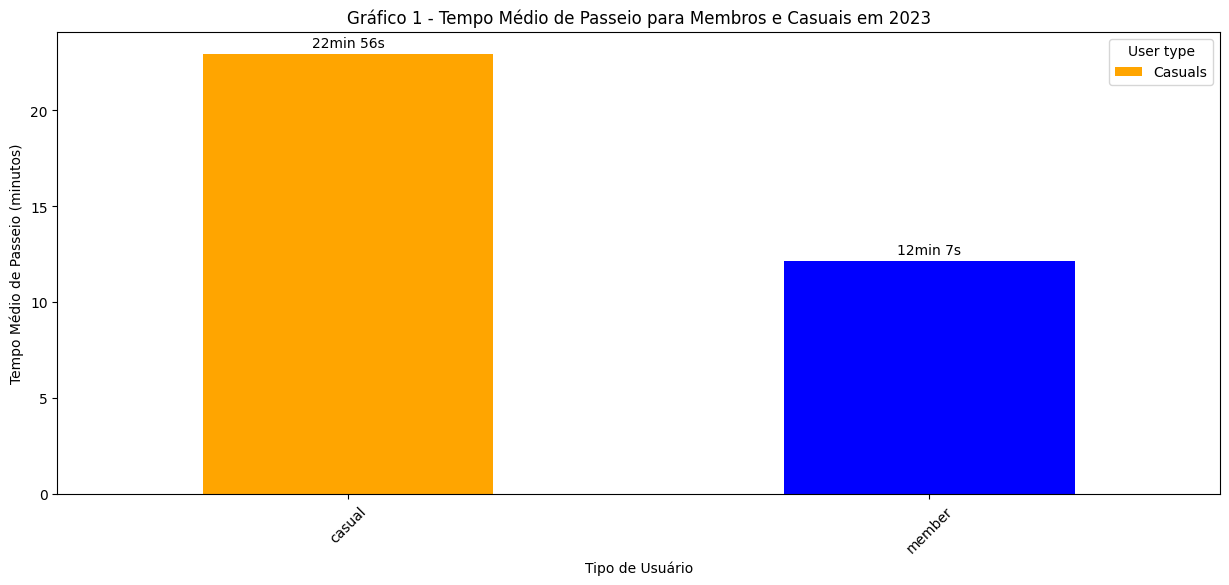

In [22]:
def converter_para_minutos_segundos(valor_em_minutos):
    minutos_inteiros = int(valor_em_minutos)
    segundos = int((valor_em_minutos - minutos_inteiros) * 60)
    return f"{minutos_inteiros}min {segundos}s"

# Supondo que 'duration_ride' esteja em Timedelta e você queira convertê-la para minutos
if isinstance(data_2023_result['duration_ride'].iloc[0], pd.Timedelta):
    data_2023_result['duration_ride_minutos'] = data_2023_result['duration_ride'].dt.total_seconds() / 60
else:
    # Se 'duration_ride' já estiver em minutos ou outra unidade numérica, ajuste conforme necessário
    data_2023['duration_ride_minutos'] = data_2023['duration_ride']  # Ajuste esta linha conforme sua situação


# Calculando o tempo médio de passeio para cada tipo de usuário (casual e member)
tempo_medio_anual = data_2023_result.groupby('member_casual')['duration_ride_minutos'].mean()

# Aplicando a conversão para os resultados de tempo médio de passeio
tempo_medio_anual_formatado = tempo_medio_anual.apply(converter_para_minutos_segundos)

# Exibindo os resultados formatados
print("Tempo Médio de Passeio em Minutos e Segundos:")
print(tempo_medio_anual_formatado)

# Para o gráfico, precisaremos manter os valores em minutos para poder plotar
ax = tempo_medio_anual.plot(kind='bar', figsize=(15, 6), color=['orange', 'blue'])

plt.title('Gráfico 1 - Tempo Médio de Passeio para Membros e Casuais em 2023')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Tempo Médio de Passeio (minutos)')

# Ajustando manualmente os labels dos ticks do eixo x para garantir clareza
ax.set_xticklabels(tempo_medio_anual.index, rotation=45)

# Gerando a legenda manualmente
plt.legend(title='User type', labels=['Casuals', 'Members'])

# Adicionando rótulos de valores nas barras, agora convertidos para minutos e segundos
for p in ax.patches:
    valor_original = p.get_height()  # Este é o valor em minutos decimais
    texto_rotulo = converter_para_minutos_segundos(valor_original)  # Convertendo
    ax.annotate(texto_rotulo, (p.get_x() + p.get_width() / 2., valor_original), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.show()


Tempo Médio de Passeio para Membros e Casual (em minutos) em cada mes de 2023.

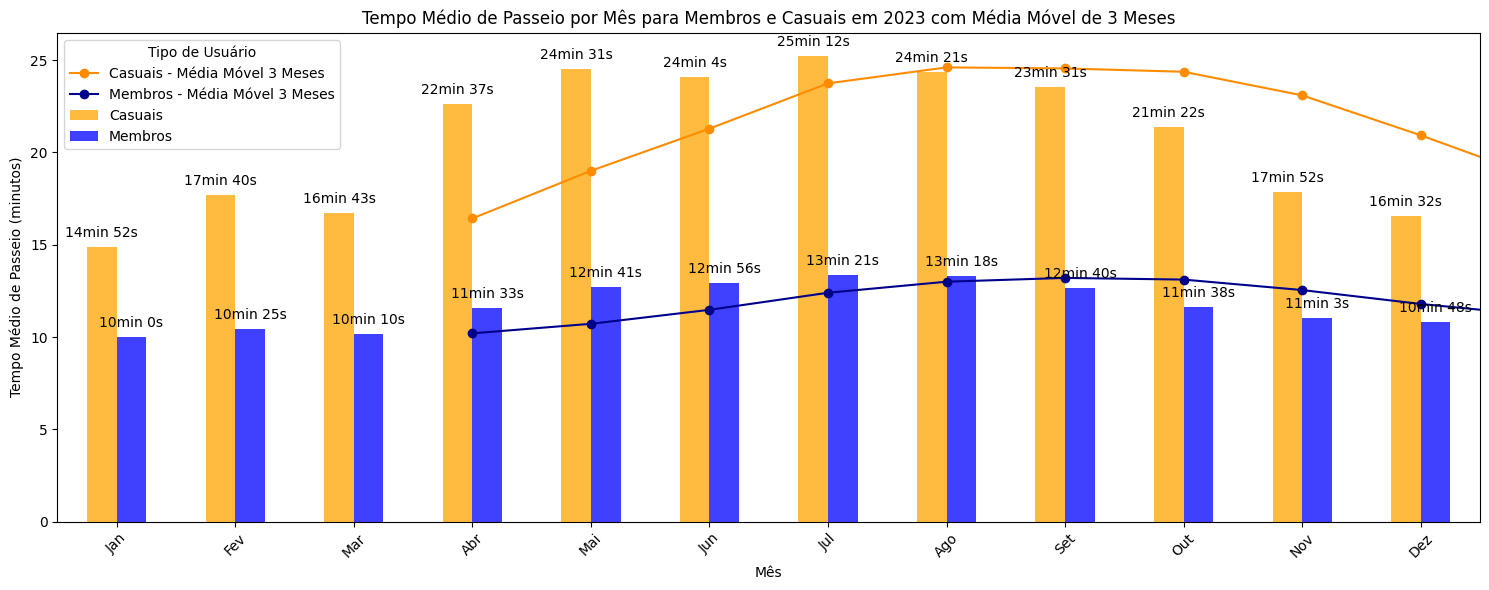

In [24]:


# Converter 'started_at' para datetime, se necessário
data_2023_result['started_at'] = pd.to_datetime(data_2023_result['started_at'])

# Criando as colunas 'mes' e 'ano' a partir de 'started_at'
data_2023_result['mes'] = data_2023_result['started_at'].dt.month
data_2023_result['ano'] = data_2023_result['started_at'].dt.year

# Verificando se 'duration_ride' está em Timedelta e convertendo para minutos, se for o caso
if isinstance(data_2023_result['duration_ride'].iloc[0], pd.Timedelta):
    data_2023_result['duration_ride_minutos'] = data_2023_result['duration_ride'].dt.total_seconds() / 60
else:
    # Se já estiver em uma unidade numérica, use diretamente ou ajuste conforme necessário
    data_2023_result['duration_ride_minutos'] = data_2023_result['duration_ride']  # Ajuste conforme necessário

# Agrupando os dados por 'member_casual' e 'mes', e calculando o tempo médio de passeio
tempo_medio_por_mes = data_2023_result.groupby(['member_casual', 'mes'])['duration_ride_minutos'].mean().unstack(0)

# Calculando a média móvel de 3 meses para cada tipo de usuário
tempo_medio_por_mes['casual_3m_avg'] = tempo_medio_por_mes['casual'].rolling(window=3).mean()
tempo_medio_por_mes['member_3m_avg'] = tempo_medio_por_mes['member'].rolling(window=3).mean()

# Função para converter valores de minutos para o formato "minutos e segundos"
def converter_para_minutos_segundos(valor_em_minutos):
    minutos = int(valor_em_minutos)
    segundos = int((valor_em_minutos - minutos) * 60)
    return f"{minutos}min {segundos}s"

# Plotando o gráfico com as barras e as linhas de média móvel
ax = tempo_medio_por_mes[['casual', 'member']].plot(kind='bar', figsize=(15, 6), color=['orange', 'blue'], alpha=0.75)
tempo_medio_por_mes[['casual_3m_avg', 'member_3m_avg']].plot(ax=ax, marker='o', linestyle='-', color=['darkorange', 'darkblue'])

plt.title('Tempo Médio de Passeio por Mês para Membros e Casuais em 2023 com Média Móvel de 3 Meses')
plt.xlabel('Mês')
plt.ylabel('Tempo Médio de Passeio (minutos)')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.legend(['Casuais - Média Móvel 3 Meses', 'Membros - Média Móvel 3 Meses', 'Casuais', 'Membros'], title='Tipo de Usuário')

plt.tight_layout()

# Adicionando rótulos de valores nas barras, formatados como minutos e segundos
for barra in ax.patches[:24]:  # Limitando às barras sem contar as linhas de média móvel
    altura = barra.get_height()
    texto_rotulo = converter_para_minutos_segundos(altura)
    ax.annotate(texto_rotulo, (barra.get_x() + barra.get_width() / 2., altura), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()



Quantidade de passeios para membros e casuais durante o ano de 2023

casual    1531757
member    2799950
Name: member_casual, dtype: int64


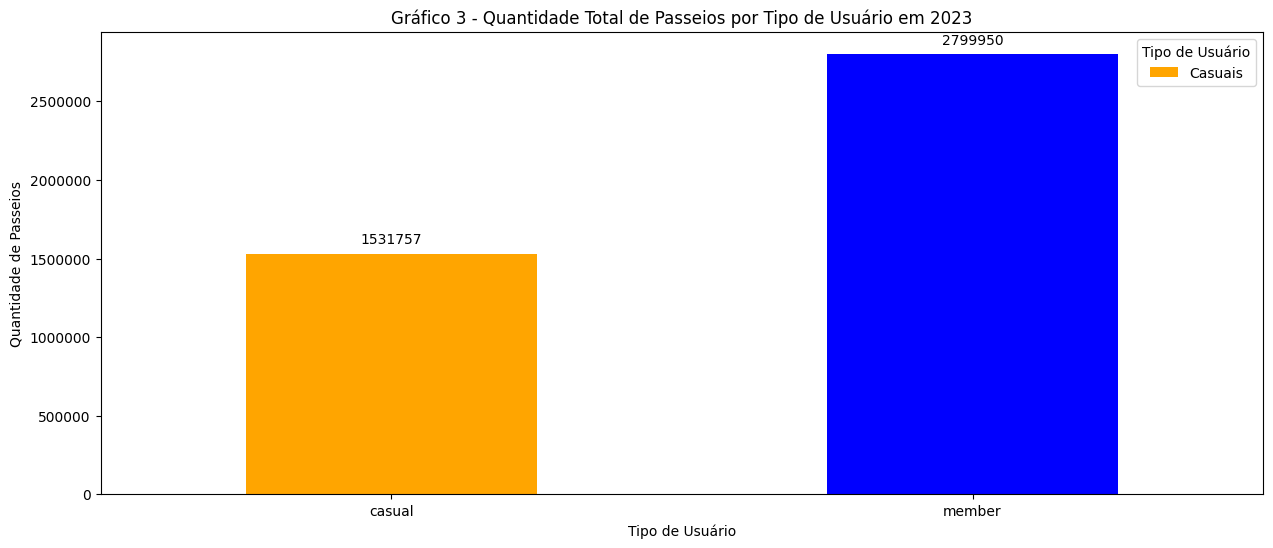

In [27]:
# Contando os passeios por tipo de usuário
contagem_total_2023 = data_2023_result['member_casual'].value_counts()

# Garantindo a ordem específica para 'casual' e 'member'
contagem_ordenada = contagem_total_2023.reindex(['casual', 'member'])

print(contagem_ordenada)

# Plotando o gráfico com as cores especificadas
ax = contagem_ordenada.plot(kind='bar', figsize=(15, 6), color=['orange', 'blue'])

plt.title('Gráfico 3 - Quantidade Total de Passeios por Tipo de Usuário em 2023')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Quantidade de Passeios')
plt.legend(title='Tipo de Usuário', labels=['Casuais', 'Membros'])
plt.xticks(rotation=0)

# Ajustando a formatação dos rótulos do eixo y para estilo 'plain'
ax.ticklabel_format(style='plain', axis='y')

# Adicionando rótulos de valores nas barras com a quantidade de passeios
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()


Quantidade de passeios para membros e casuais durante cada mes de 2023

member_casual  casual  member
mes                          
1               29621  118663
2               32776  116784
3               46792  153655
4              110538  213659
5              177039  286188
6              219794  314964
7              245294  328664
8              233856  351063
9              196964  309671
10             130300  273481
11              72097  202701
12              36686  130457


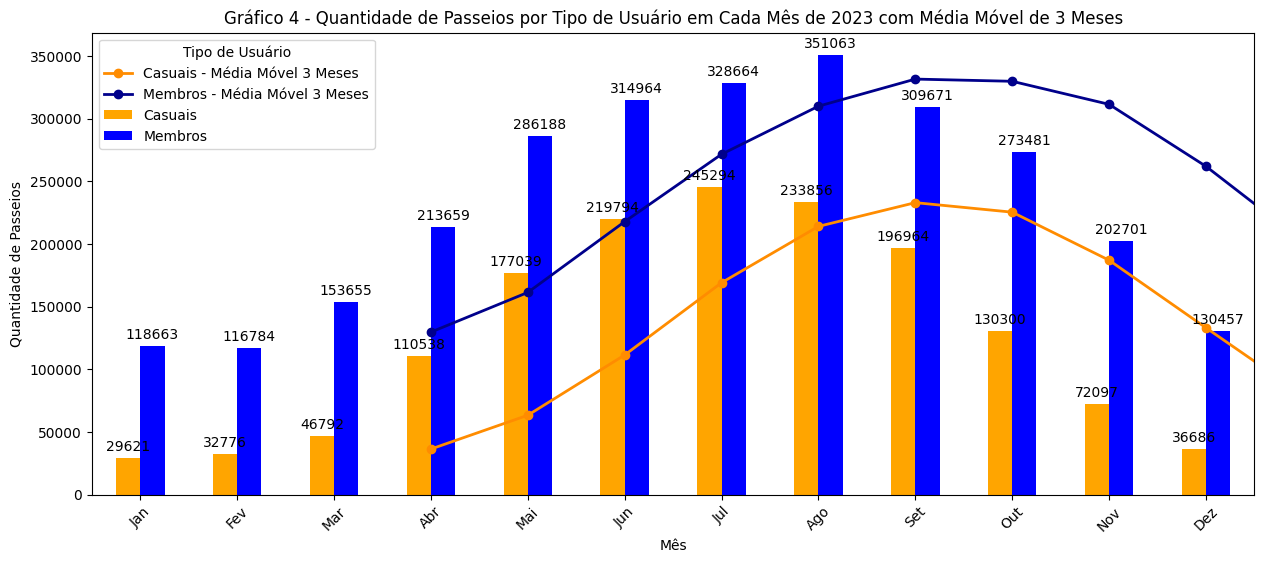

In [29]:
# Agrupando por mês e tipo de usuário para contar o número de passeios
contagem_mensal_2023 = data_2023_result.groupby(['mes', 'member_casual']).size().unstack(fill_value=0)

print(contagem_mensal_2023)

# Reordenando as colunas para garantir a correspondência das cores
# A ordem aqui determina a ordem no gráfico
contagem_mensal_2023 = contagem_mensal_2023[['casual', 'member']]

# Calculando a média móvel de 3 meses para 'casual' e 'member'
contagem_mensal_2023['casual_3m_avg'] = contagem_mensal_2023['casual'].rolling(window=3).mean()
contagem_mensal_2023['member_3m_avg'] = contagem_mensal_2023['member'].rolling(window=3).mean()

# Plotando o gráfico com as barras para 'casual' e 'member'
ax = contagem_mensal_2023[['casual', 'member']].plot(kind='bar', figsize=(15, 6), color=['orange', 'blue'])

# Adicionando a média móvel ao gráfico como linhas
# Nota: 'ax=ax' garante que as linhas sejam plotadas no mesmo eixo das barras
contagem_mensal_2023[['casual_3m_avg', 'member_3m_avg']].plot(ax=ax, marker='o', linestyle='-', linewidth=2, color=['darkorange', 'darkblue'])

plt.title('Gráfico 4 - Quantidade de Passeios por Tipo de Usuário em Cada Mês de 2023 com Média Móvel de 3 Meses')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Passeios')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.legend(['Casuais - Média Móvel 3 Meses', 'Membros - Média Móvel 3 Meses', 'Casuais', 'Membros'], title='Tipo de Usuário', loc='upper left')

# Iterando sobre as barras para adicionar rótulos de valores
for barra in ax.patches:
    # Usando a altura da barra para determinar o valor do rótulo
    valor = barra.get_height()
    # Posicionando o rótulo acima da barra
    ax.annotate(f'{int(valor)}',
                (barra.get_x() + barra.get_width() / 2, valor),
                ha='center', va='bottom',
                xytext=(0, 3),  # Deslocamento vertical para o rótulo não ficar sobre a barra
                textcoords='offset points')


plt.show()

Quantidade de passeios por dia da semana durante o ano de 2023 para usuarios membros e casuais

member_casual         casual         member
day_week                                   
Sunday         254761.000000  307870.000000
Monday         175401.000000  386697.000000
Tuesday        181537.000000  448850.000000
Wednesday      183092.000000  452721.000000
Thursday       198931.000000  452660.000000
Friday         227869.000000  400507.000000
Saturday       310166.000000  350645.000000
Average        218822.428571  399992.857143


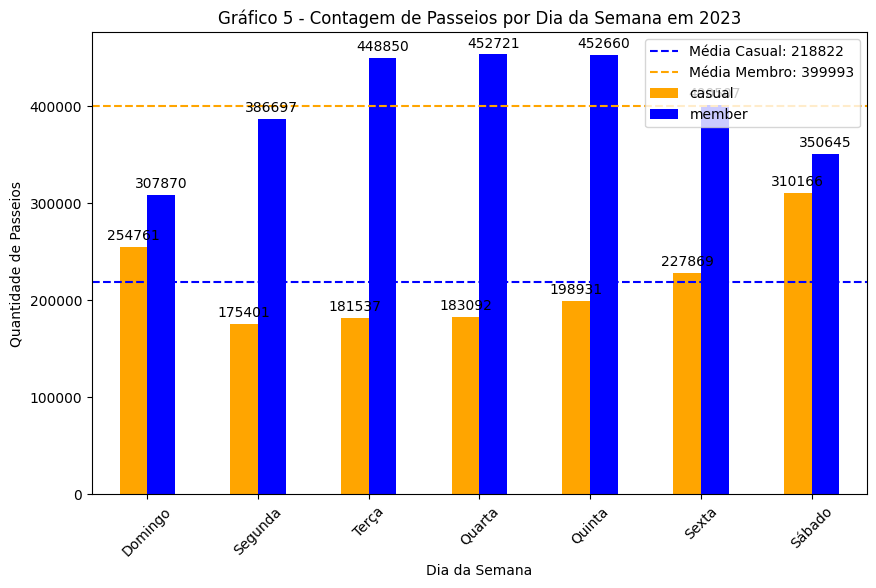

In [30]:
# Supondo que 'data_2023' já esteja definido e contém os dados de 2023
data_2023_result['started_at'] = pd.to_datetime(data_2023_result['started_at'])
data_2023_result['ano'] = data_2023_result['started_at'].dt.year
data_2023 = data_2023_result[data_2023_result['ano'] == 2023]

# Agrupando a contagem de passeios por dia da semana e tipo de usuário
contagem_dia_semana = data_2023.groupby(['day_week', 'member_casual']).size().unstack(fill_value=0)

# Definindo a ordem correta dos dias da semana para a visualização
dias_da_semana_ordem = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
contagem_dia_semana = contagem_dia_semana.reindex(dias_da_semana_ordem)

# Calculando as médias para cada tipo de usuário e adicionando uma linha 'Average' ao DataFrame
media_casual = contagem_dia_semana['casual'].mean()
media_member = contagem_dia_semana['member'].mean()
contagem_dia_semana.loc['Average'] = [media_casual, media_member]

# Imprimindo a tabela atualizada com a média
print(contagem_dia_semana)

# Plotando o gráfico de barras com a contagem de passeios
ax = contagem_dia_semana.drop(index='Average').plot(kind='bar', figsize=(10, 6), color=['orange', 'blue' ])

plt.title('Gráfico 5 - Contagem de Passeios por Dia da Semana em 2023')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Passeios')
plt.xticks(ticks=range(7), labels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation=45)
plt.legend(title='Tipo de Usuário', labels=['Casuais', 'Membros'])

# Adicionando rótulos de valores nas barras para mostrar as quantidades exatas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

# Exibindo a média geral no gráfico
plt.axhline(y=media_casual, color='blue', linestyle='--', label=f'Média Casual: {media_casual:.0f}')
plt.axhline(y=media_member, color='orange', linestyle='--', label=f'Média Membro: {media_member:.0f}')
plt.legend()


plt.show()

Quantidade de passeios por dia da semana durante os meses de 2023 para usuarios membros e casuais

Janeiro - Contagem de Passeios e Médias:
                casual        member
Sunday     4834.000000  12133.000000
Monday     4209.000000  17949.000000
Tuesday    5123.000000  23720.000000
Wednesday  4454.000000  19875.000000
Thursday   3653.000000  17902.000000
Friday     3603.000000  15761.000000
Saturday   3745.000000  11323.000000
Average    4231.571429  16951.857143


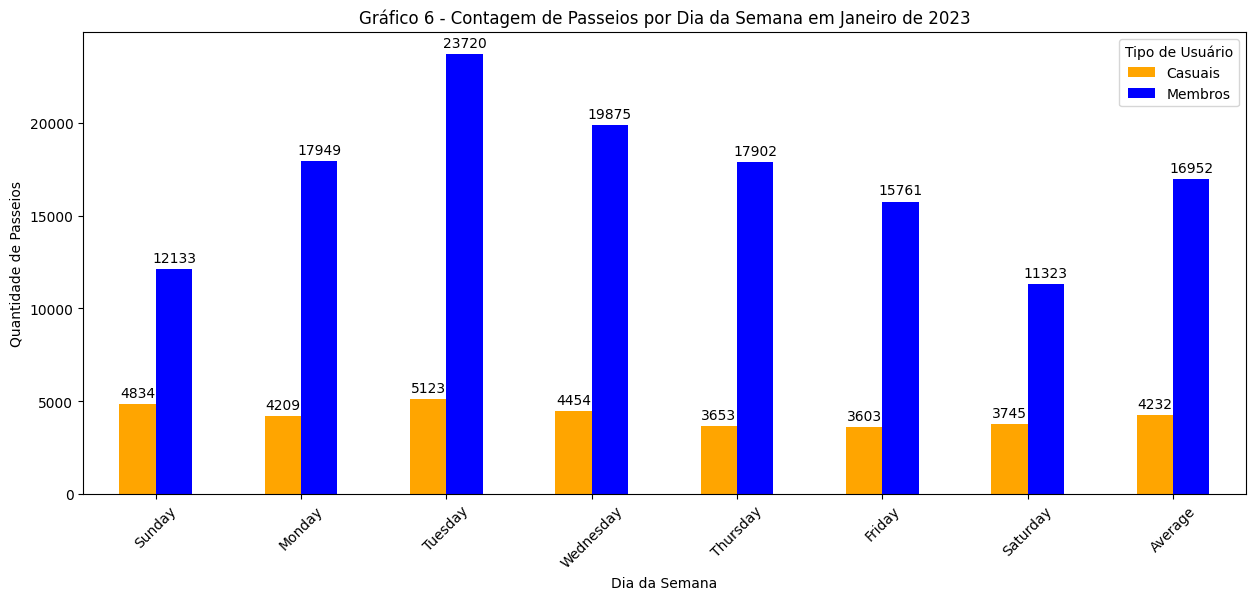

Fevereiro - Contagem de Passeios e Médias:
                casual        member
Sunday     7987.000000  15977.000000
Monday     5101.000000  19460.000000
Tuesday    5072.000000  22996.000000
Wednesday  3414.000000  16926.000000
Thursday   2738.000000  14465.000000
Friday     3099.000000  13641.000000
Saturday   5365.000000  13319.000000
Average    4682.285714  16683.428571


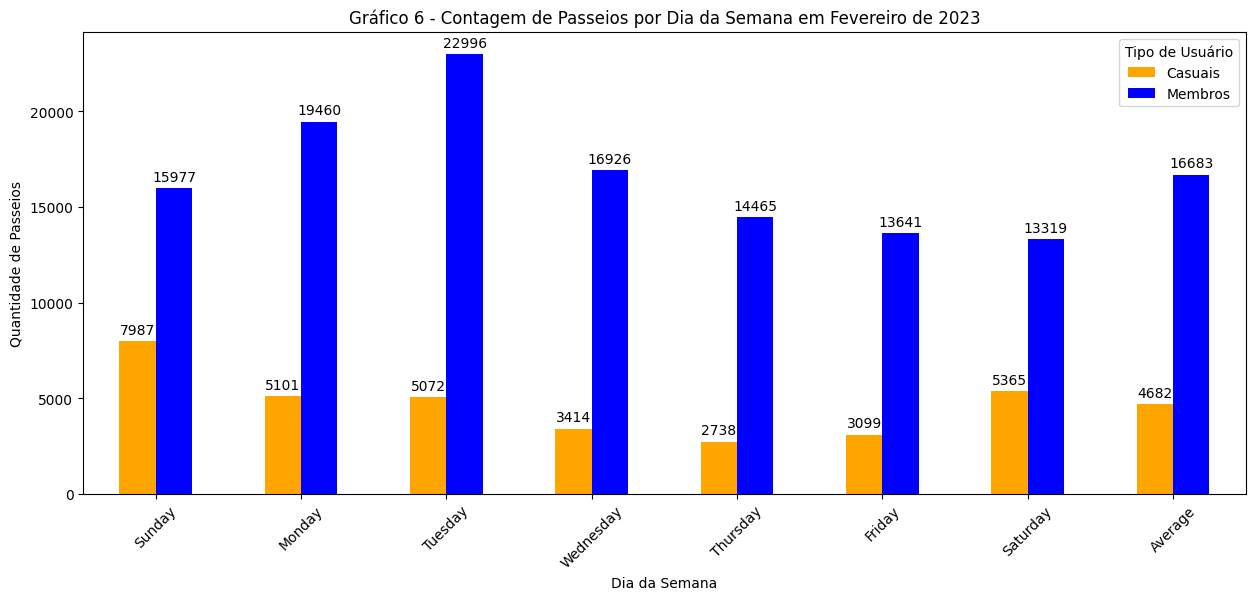

Março - Contagem de Passeios e Médias:
                casual        member
Sunday     5701.000000  13227.000000
Monday     5084.000000  20189.000000
Tuesday    7003.000000  25612.000000
Wednesday  8633.000000  31500.000000
Thursday   7649.000000  28179.000000
Friday     6839.000000  22235.000000
Saturday   5883.000000  12713.000000
Average    6684.571429  21950.714286


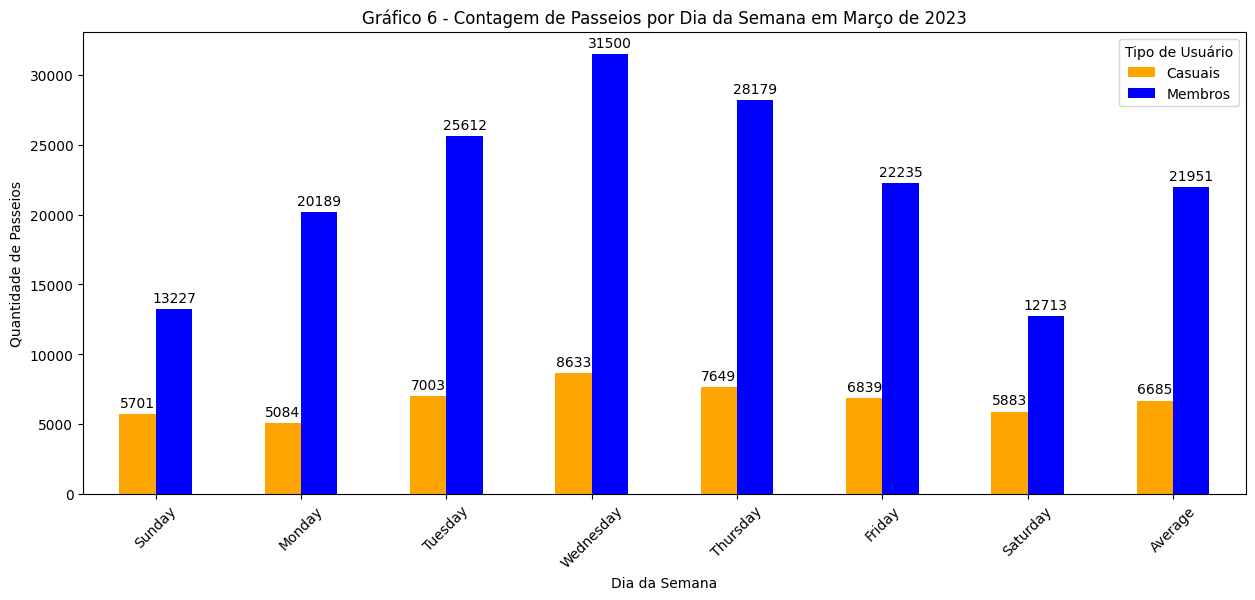

Abril - Contagem de Passeios e Médias:
                 casual        member
Sunday     14225.000000  22365.000000
Monday      9100.000000  26448.000000
Tuesday    11554.000000  31343.000000
Wednesday  13667.000000  33346.000000
Thursday   17496.000000  37285.000000
Friday     19307.000000  32925.000000
Saturday   25189.000000  29947.000000
Average    15791.142857  30522.714286


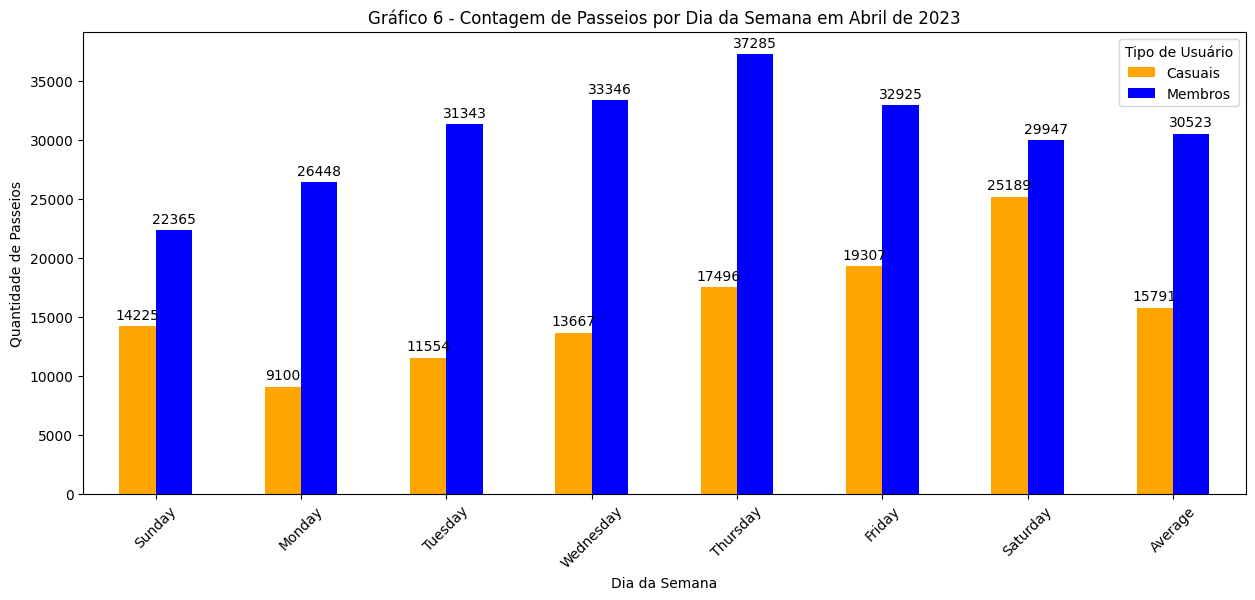

Maio - Contagem de Passeios e Médias:
                 casual   member
Sunday     32874.000000  31455.0
Monday     22242.000000  38242.0
Tuesday    24951.000000  53146.0
Wednesday  23231.000000  52365.0
Thursday   21120.000000  43306.0
Friday     21393.000000  35219.0
Saturday   31228.000000  32455.0
Average    25291.285714  40884.0


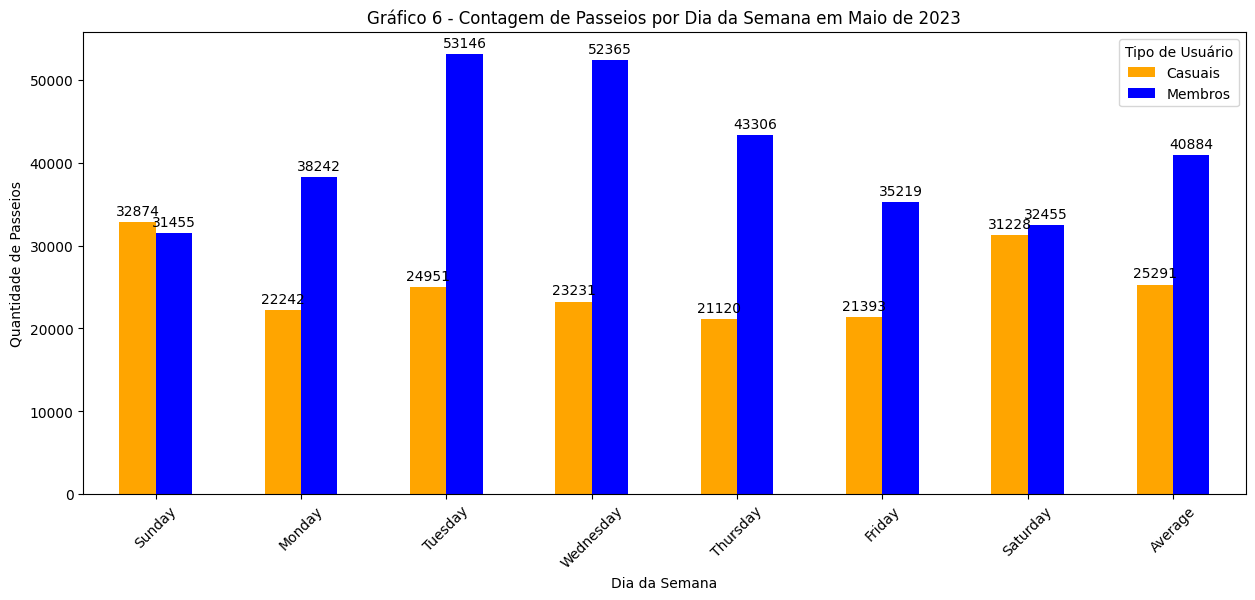

Junho - Contagem de Passeios e Médias:
                 casual        member
Sunday     30899.000000  31412.000000
Monday     23761.000000  41186.000000
Tuesday    18218.000000  39693.000000
Wednesday  24645.000000  46475.000000
Thursday   31055.000000  56201.000000
Friday     40462.000000  55482.000000
Saturday   50754.000000  44515.000000
Average    31399.142857  44994.857143


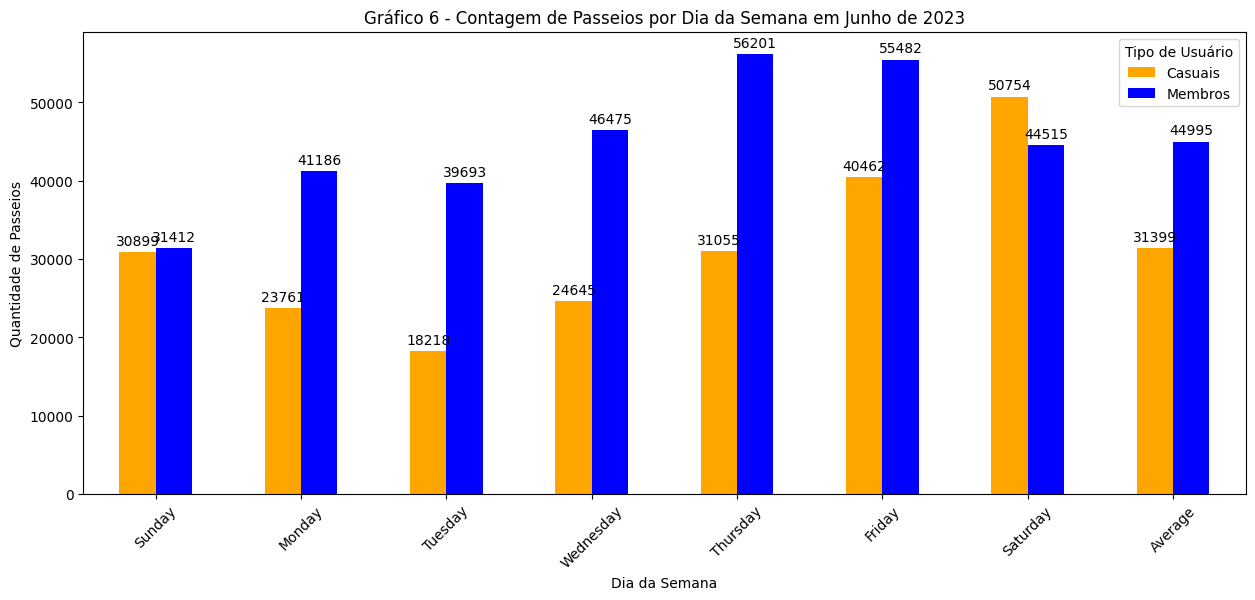

Julho - Contagem de Passeios e Médias:
            casual   member
Sunday     44948.0  42922.0
Monday     36434.0  56927.0
Tuesday    29764.0  45832.0
Wednesday  20473.0  41006.0
Thursday   28368.0  49593.0
Friday     31938.0  44016.0
Saturday   53369.0  48368.0
Average    35042.0  46952.0


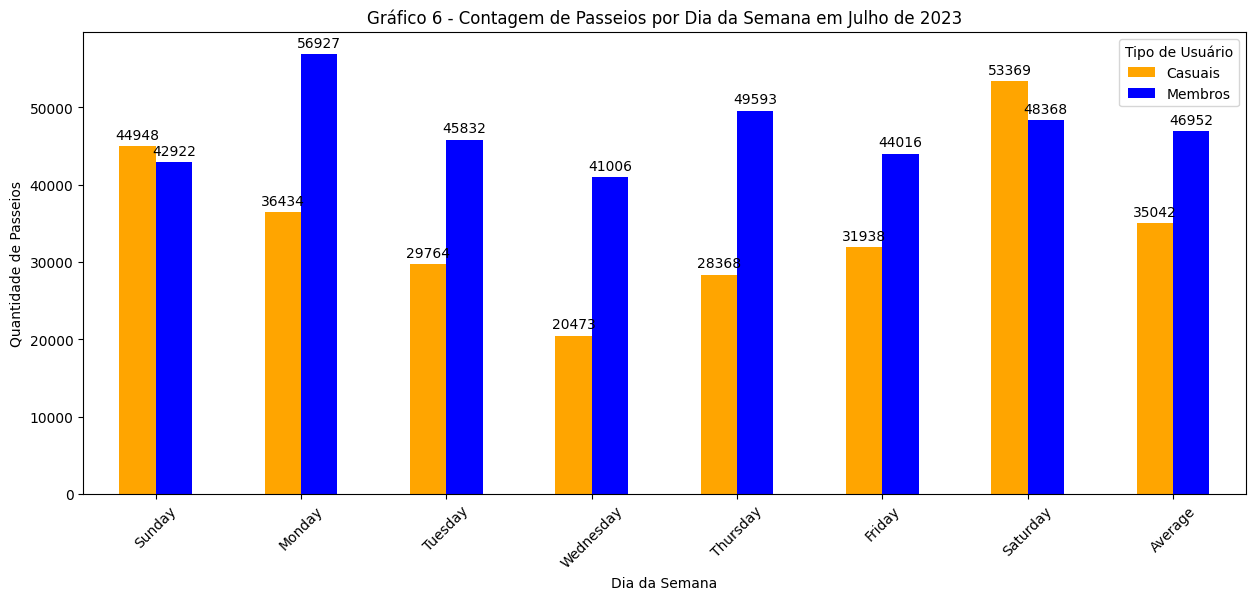

Agosto - Contagem de Passeios e Médias:
            casual        member
Sunday     35840.0  36514.000000
Monday     20250.0  40359.000000
Tuesday    31699.0  64348.000000
Wednesday  33731.0  63221.000000
Thursday   33429.0  58931.000000
Friday     36358.0  47772.000000
Saturday   42549.0  39918.000000
Average    33408.0  50151.857143


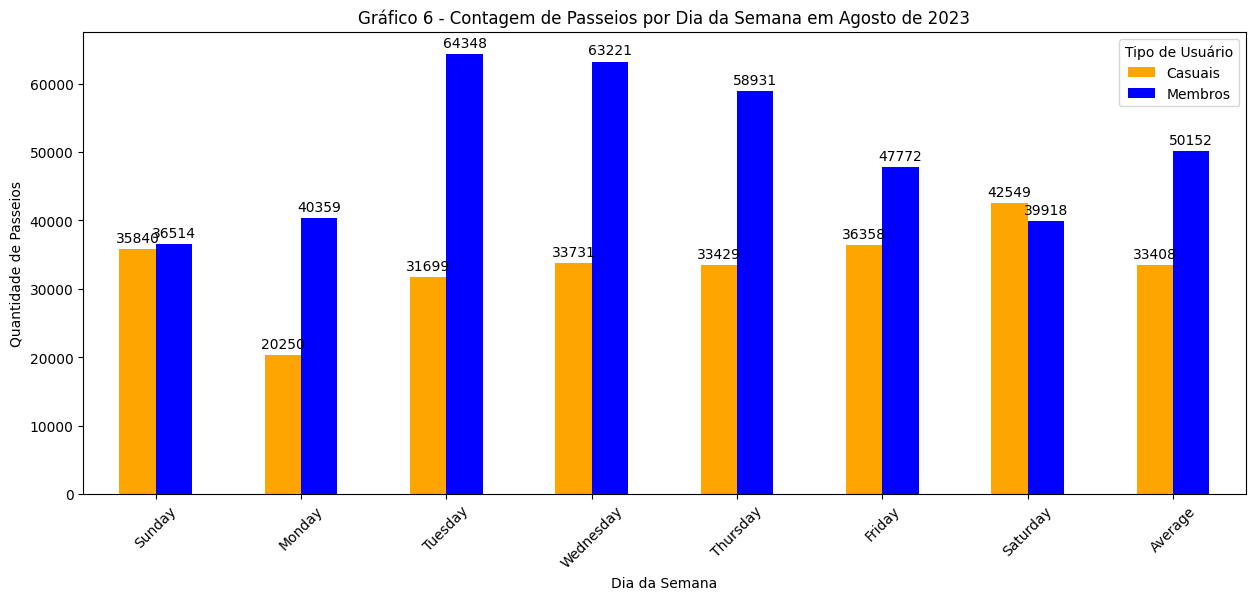

Setembro - Contagem de Passeios e Médias:
                 casual        member
Sunday     33843.000000  34183.000000
Monday     19707.000000  33835.000000
Tuesday    16939.000000  41614.000000
Wednesday  19282.000000  46898.000000
Thursday   20948.000000  47835.000000
Friday     33726.000000  53516.000000
Saturday   52519.000000  51790.000000
Average    28137.714286  44238.714286


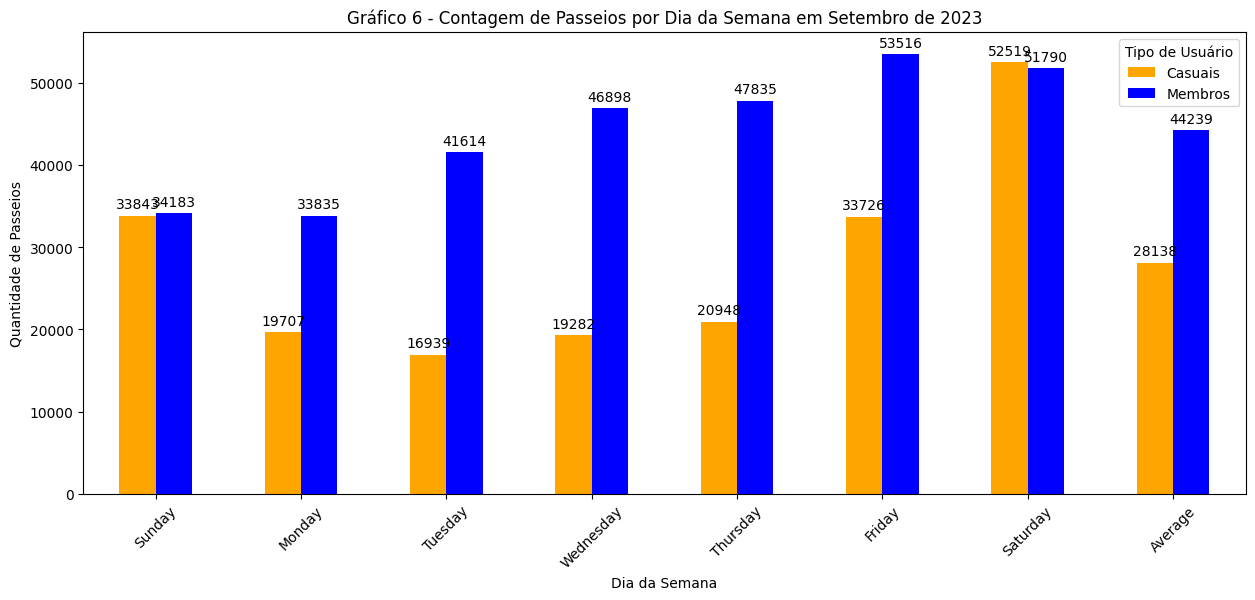

Outubro - Contagem de Passeios e Médias:
                 casual        member
Sunday     27846.000000  34719.000000
Monday     18015.000000  46333.000000
Tuesday    19851.000000  52625.000000
Wednesday  16670.000000  42591.000000
Thursday   14102.000000  38272.000000
Friday     14984.000000  32413.000000
Saturday   18832.000000  26528.000000
Average    18614.285714  39068.714286


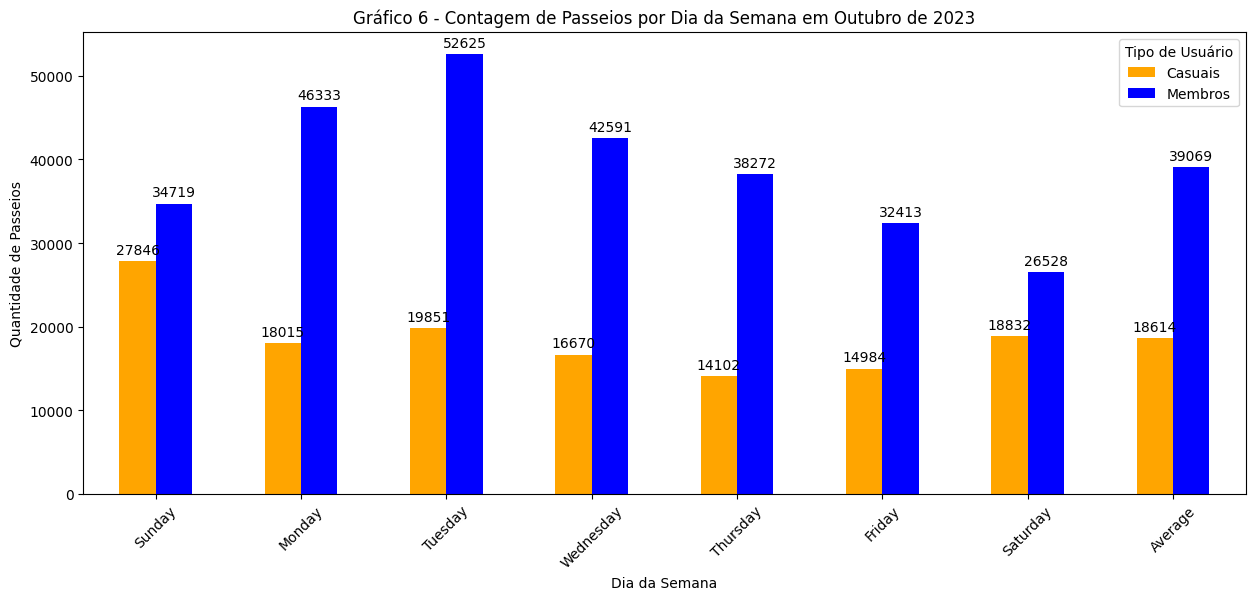

Novembro - Contagem de Passeios e Médias:
                 casual        member
Sunday     10451.000000  19451.000000
Monday      7961.000000  28933.000000
Tuesday     7577.000000  29959.000000
Wednesday   9865.000000  37077.000000
Thursday   12959.000000  38983.000000
Friday      9482.000000  25594.000000
Saturday   13802.000000  22704.000000
Average    10299.571429  28957.285714


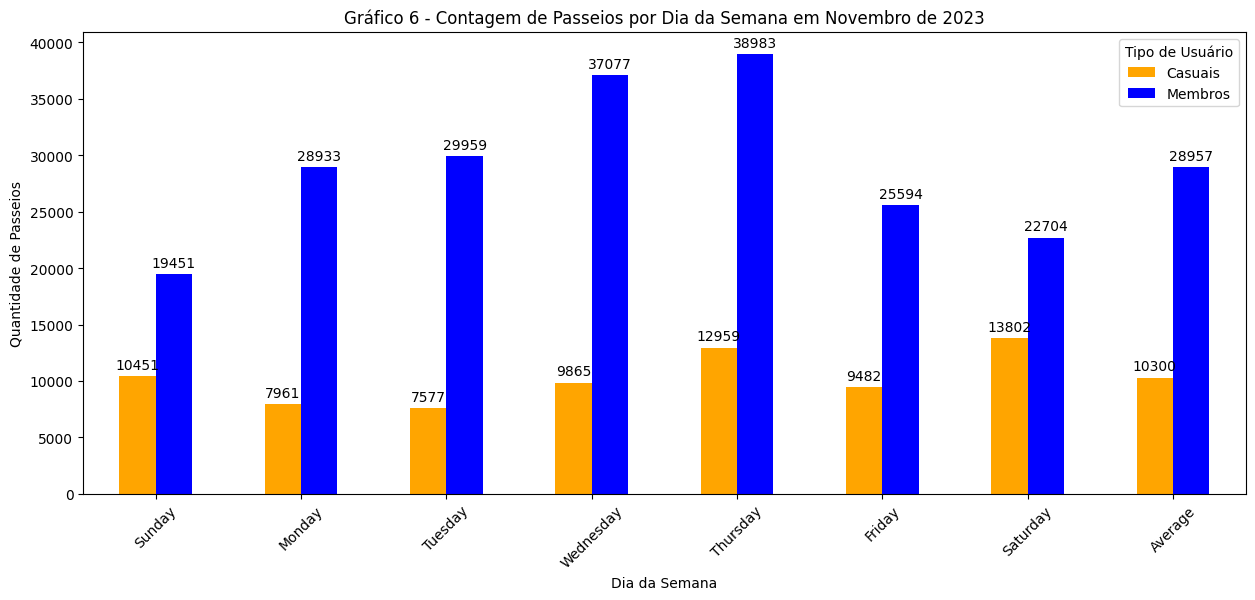

Dezembro - Contagem de Passeios e Médias:
                casual        member
Sunday     5313.000000  13512.000000
Monday     3537.000000  16836.000000
Tuesday    3786.000000  17962.000000
Wednesday  5027.000000  21441.000000
Thursday   5414.000000  21708.000000
Friday     6678.000000  21933.000000
Saturday   6931.000000  17065.000000
Average    5240.857143  18636.714286


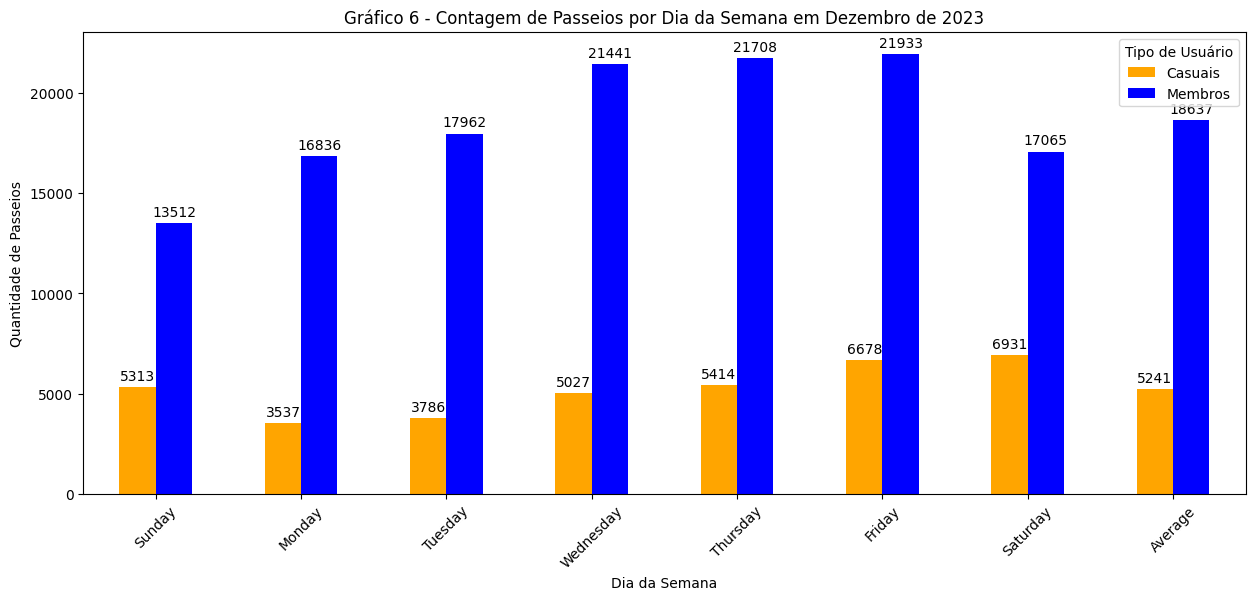

In [31]:
# Supondo que data_2023 já esteja definido e contém os dados de 2023
data_2023_result['started_at'] = pd.to_datetime(data_2023_result['started_at'])
data_2023_result['ano'] = data_2023_result['started_at'].dt.year
data_2023 = data_2023_result[data_2023_result['ano'] == 2023]

# Agrupando os dados por mês, dia da semana e tipo de usuário
contagem_mensal_dia_semana = data_2023.groupby(['mes', 'day_week', 'member_casual']).size().unstack(fill_value=0)

# Nomes dos meses para títulos dos gráficos
nomes_dos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

for mes in range(1, 13):
    # Filtrando os dados para o mês específico
    contagem = contagem_mensal_dia_semana.loc[mes].reindex(dias_da_semana_ordem)

    # Calculando a média de passeios para cada tipo de usuário
    media_casual = contagem['casual'].mean()
    media_member = contagem['member'].mean()

    # Criando um DataFrame para as médias
    medias_df = pd.DataFrame({'casual': [media_casual], 'member': [media_member]}, index=['Average'])

    # Concatenando o DataFrame de contagem com as médias usando pd.concat
    contagem_com_media = pd.concat([contagem, medias_df])

    # Imprimindo os dados com médias
    print(f'{nomes_dos_meses[mes-1]} - Contagem de Passeios e Médias:')
    print(contagem_com_media)

    # Plotando o gráfico para o mês
    ax = contagem_com_media.plot(kind='bar', figsize=(15, 6), color=['orange', 'blue'])
    plt.title(f'Gráfico 6 - Contagem de Passeios por Dia da Semana em {nomes_dos_meses[mes-1]} de 2023')
    plt.xlabel('Dia da Semana')
    plt.ylabel('Quantidade de Passeios')
    plt.xticks(np.arange(len(contagem_com_media.index)), labels=contagem_com_media.index, rotation=45)
    plt.legend(title='Tipo de Usuário', labels=['Casuais', 'Membros'])

    # Adicionando rótulos de valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')


    plt.show()


Tempo Médio de Passeio por cada dia da semana para usuarios membros e casuais durante o ano de 2023

In [ ]:
# Função para converter minutos decimais para o formato de minutos e segundos
def converter_para_minutos_segundos(minutos_decimais):
    minutos = int(minutos_decimais)
    segundos = int((minutos_decimais - minutos) * 60)
    return f"{minutos}min {segundos}s"

# Supondo que 'duration_ride' esteja em Timedelta e você queira convertê-la para minutos
if isinstance(data_2023['duration_ride'].iloc[0], pd.Timedelta):
    data_2023['duration_ride_minutos'] = data_2023['duration_ride'].dt.total_seconds() / 60
else:
    # Se 'duration_ride' já estiver em minutos ou outra unidade numérica, ajuste conforme necessário
    data_2023['duration_ride_minutos'] = data_2023['duration_ride']  # Ajuste esta linha conforme sua situação



# Calculando o tempo médio de passeio por dia da semana para cada tipo de usuário
tempo_medio_dia_semana = data_2023.groupby(['day_week', 'member_casual'])['duration_ride_minutos'].mean().unstack()

# Reordenando os dias da semana
dias_da_semana_ordem = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
tempo_medio_dia_semana = tempo_medio_dia_semana.reindex(dias_da_semana_ordem)

# Calculando a média geral para "casual" e "member" e adicionando como uma nova linha "Average"
media_casual = tempo_medio_dia_semana['casual'].mean()
media_member = tempo_medio_dia_semana['member'].mean()
tempo_medio_dia_semana.loc['Average'] = [media_casual, media_member]

# Convertendo os valores de tempo médio para minutos e segundos
tempo_medio_dia_semana_convertido = tempo_medio_dia_semana.applymap(converter_para_minutos_segundos)

# Imprimindo os resultados convertidos
print("Tempo Médio de Passeio por Dia da Semana para Membros e Casuais em 2023 (Formato Minutos e Segundos):")
print(tempo_medio_dia_semana_convertido)

# Plotando o gráfico
ax = tempo_medio_dia_semana.plot(kind='bar', figsize=(15, 6), color=[ 'orange', 'blue'])

plt.title('Gráfico 7 - Tempo Médio de Passeio por Dia da Semana para Membros e Casuais em 2023')
plt.xlabel('Dia da Semana')
plt.ylabel('Tempo Médio de Passeio (minutos)')
plt.xticks(ticks=range(8), labels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Média'], rotation=45)
plt.legend(title='Tipo de Usuário', labels=['Casuais', 'Membros'])

plt.tight_layout()

# Adicionando rótulos de valores nas barras, formatados como minutos e segundos
for barra in ax.patches:
    altura = barra.get_height()
    texto_rotulo = converter_para_minutos_segundos(altura)
    ax.annotate(texto_rotulo, (barra.get_x() + barra.get_width() / 2., altura), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.show()

Tempo Médio de Passeio por cada dia da semana para usuarios membros e casuais durante cada mes de 2023


Dados do Tempo Médio de Passeio por Dia da Semana em Janeiro de 2023:
member_casual     casual     member
day_week                           
Sunday         19min 57s  10min 59s
Monday         14min 24s   9min 39s
Tuesday        13min 53s   9min 49s
Wednesday      13min 58s   10min 3s
Thursday        12min 1s   9min 29s
Friday         12min 19s   10min 7s
Saturday       16min 31s  10min 24s
Average        14min 43s   10min 4s


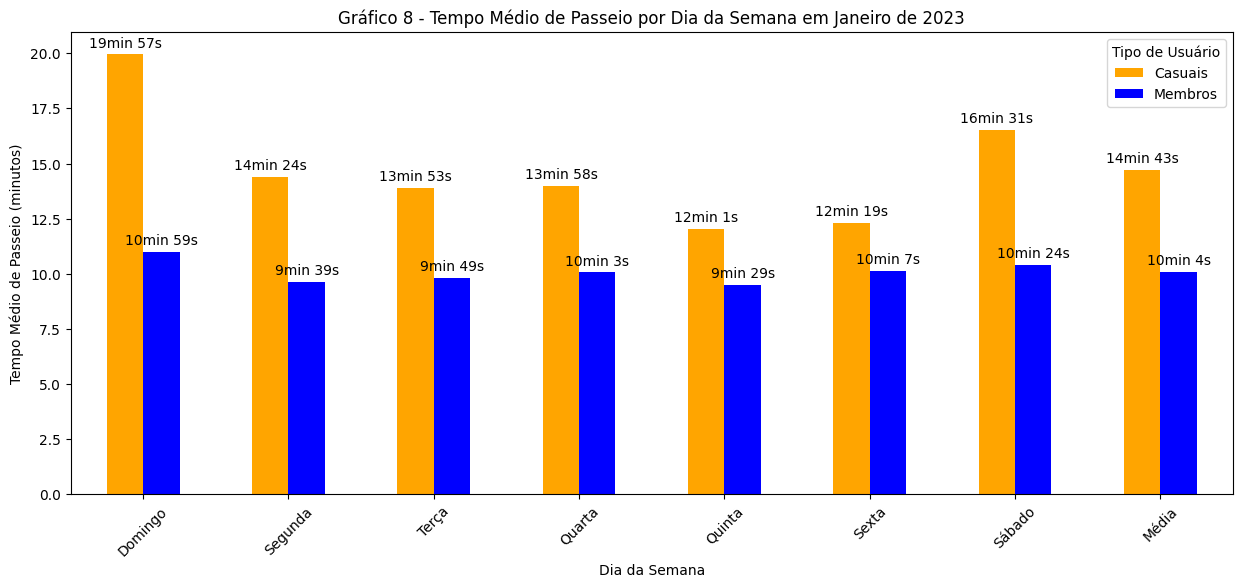


Dados do Tempo Médio de Passeio por Dia da Semana em Fevereiro de 2023:
member_casual     casual     member
day_week                           
Sunday          23min 1s  12min 25s
Monday         16min 35s  10min 11s
Tuesday        13min 54s   9min 49s
Wednesday      12min 28s   9min 37s
Thursday       14min 44s   9min 37s
Friday         15min 47s   9min 52s
Saturday        20min 9s  11min 49s
Average        16min 40s  10min 29s


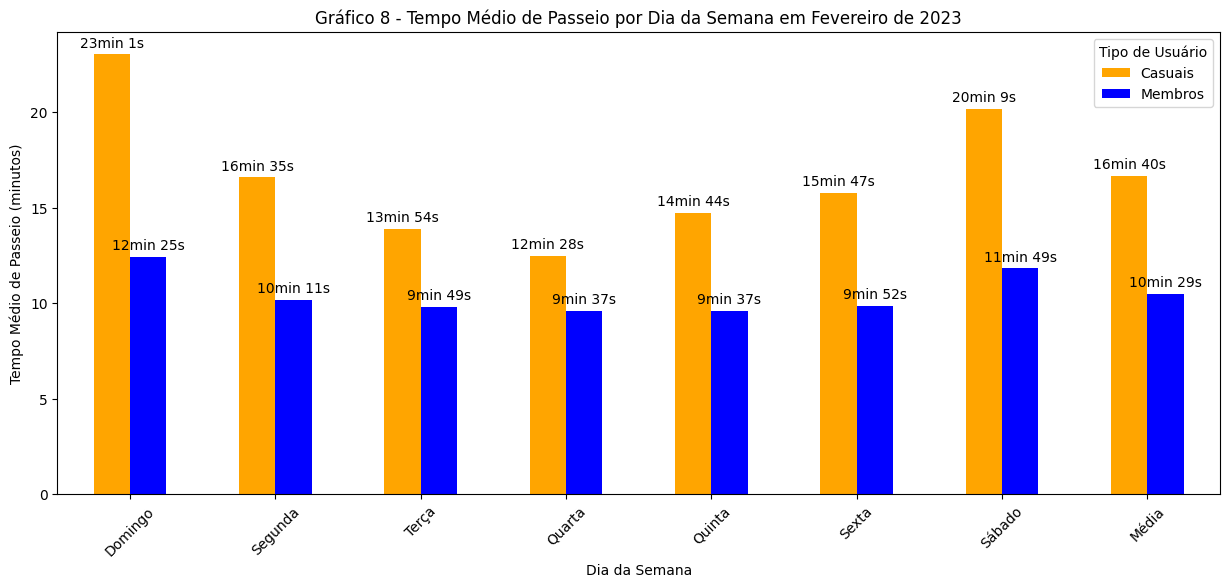


Dados do Tempo Médio de Passeio por Dia da Semana em Março de 2023:
member_casual     casual     member
day_week                           
Sunday         19min 50s  10min 53s
Monday         15min 59s   9min 48s
Tuesday        16min 50s  10min 25s
Wednesday      15min 32s  10min 17s
Thursday       14min 35s   9min 42s
Friday         16min 26s   9min 42s
Saturday       18min 59s   11min 1s
Average        16min 53s  10min 15s


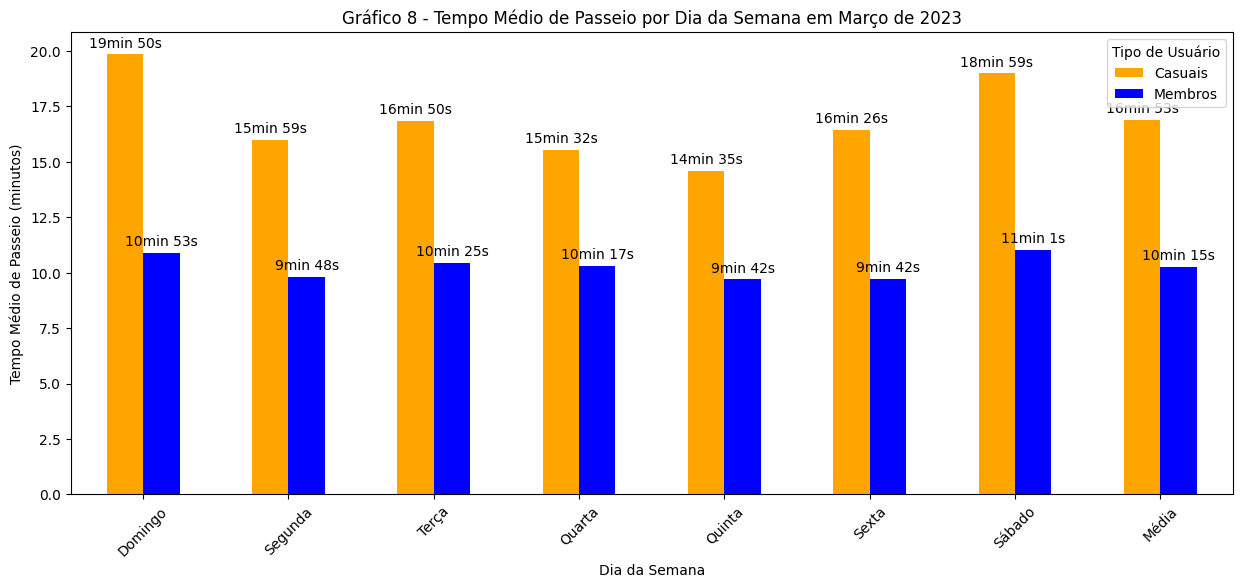


Dados do Tempo Médio de Passeio por Dia da Semana em Abril de 2023:
member_casual     casual     member
day_week                           
Sunday         25min 44s  12min 19s
Monday         20min 14s   10min 7s
Tuesday         20min 1s  11min 22s
Wednesday      19min 54s  11min 14s
Thursday       20min 41s  11min 28s
Friday         22min 10s  11min 26s
Saturday        26min 3s   13min 0s
Average         22min 7s  11min 34s


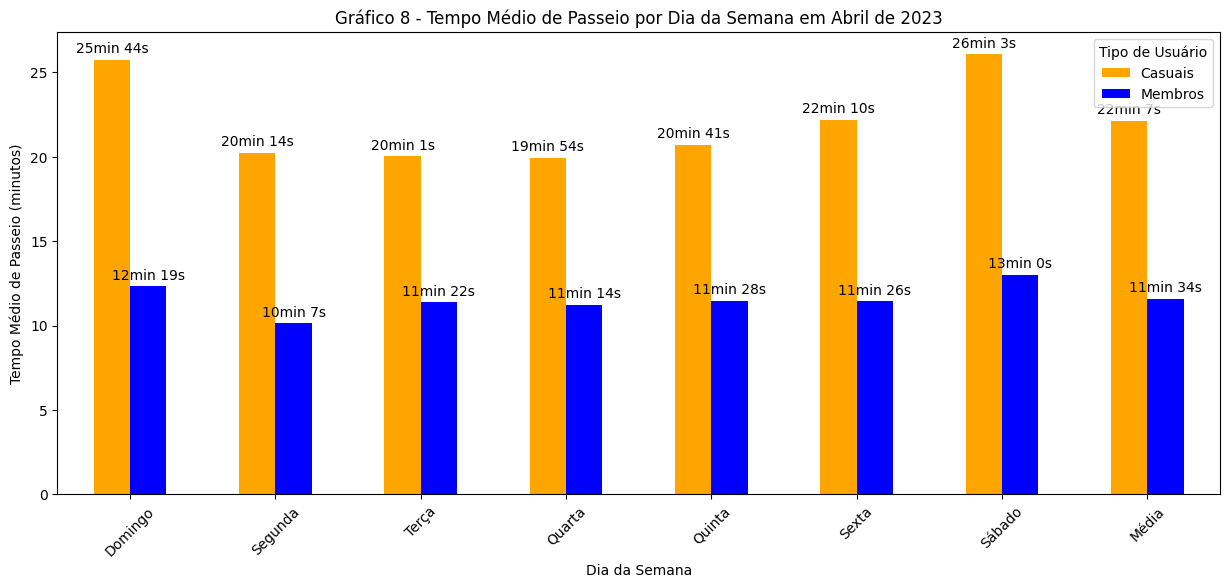


Dados do Tempo Médio de Passeio por Dia da Semana em Maio de 2023:
member_casual     casual     member
day_week                           
Sunday         28min 50s  14min 41s
Monday         25min 50s   12min 8s
Tuesday        22min 23s  12min 24s
Wednesday      20min 45s   12min 3s
Thursday       21min 21s  12min 11s
Friday         22min 23s  12min 14s
Saturday        27min 8s   14min 4s
Average         24min 6s  12min 49s


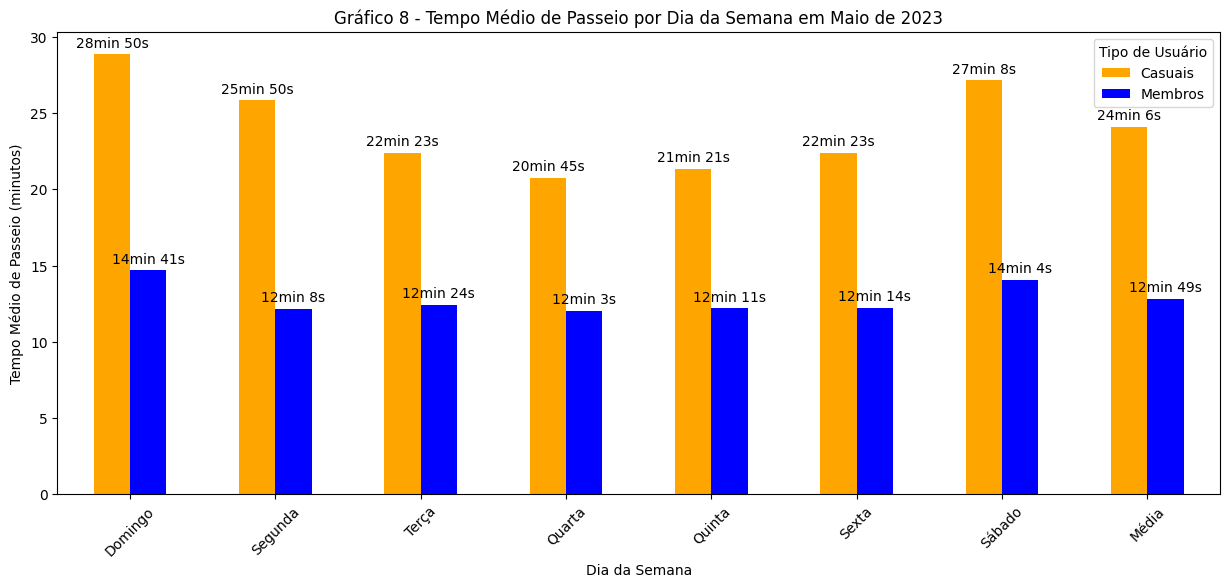


Dados do Tempo Médio de Passeio por Dia da Semana em Junho de 2023:
member_casual     casual     member
day_week                           
Sunday         26min 45s  14min 19s
Monday         23min 26s  12min 32s
Tuesday         20min 4s  11min 44s
Wednesday      20min 49s  12min 15s
Thursday       21min 13s  12min 16s
Friday          24min 2s  12min 50s
Saturday       27min 31s   15min 7s
Average        23min 24s   13min 0s


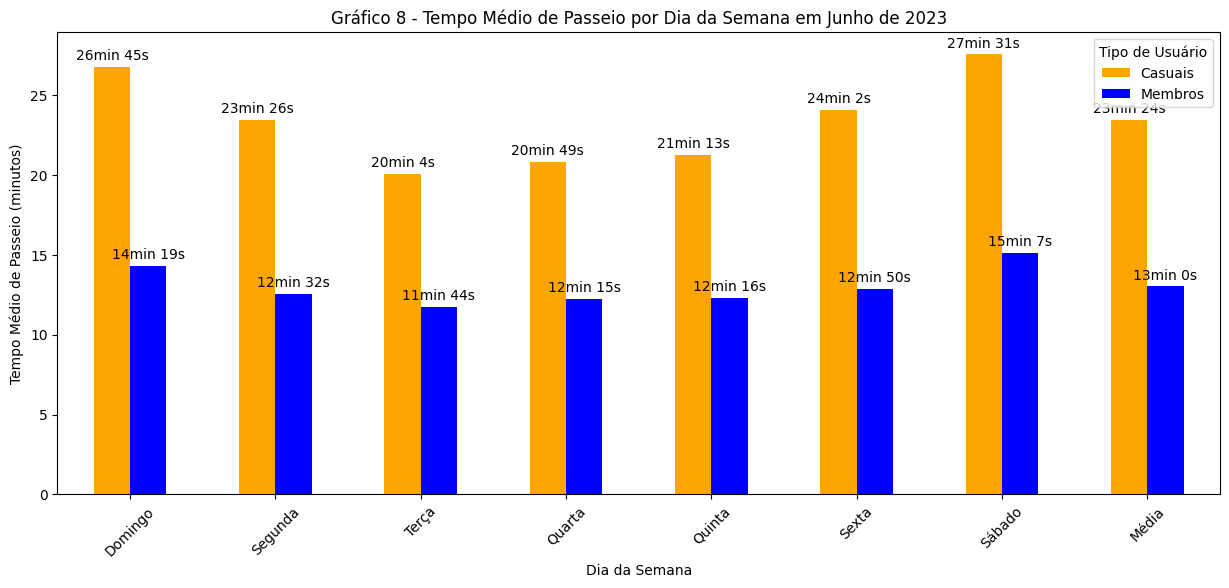


Dados do Tempo Médio de Passeio por Dia da Semana em Julho de 2023:
member_casual     casual     member
day_week                           
Sunday          28min 3s  14min 54s
Monday         25min 14s   13min 0s
Tuesday         25min 3s  13min 16s
Wednesday      20min 53s  12min 13s
Thursday        22min 9s  12min 39s
Friday          24min 5s  12min 56s
Saturday       26min 50s  14min 29s
Average        24min 37s  13min 21s


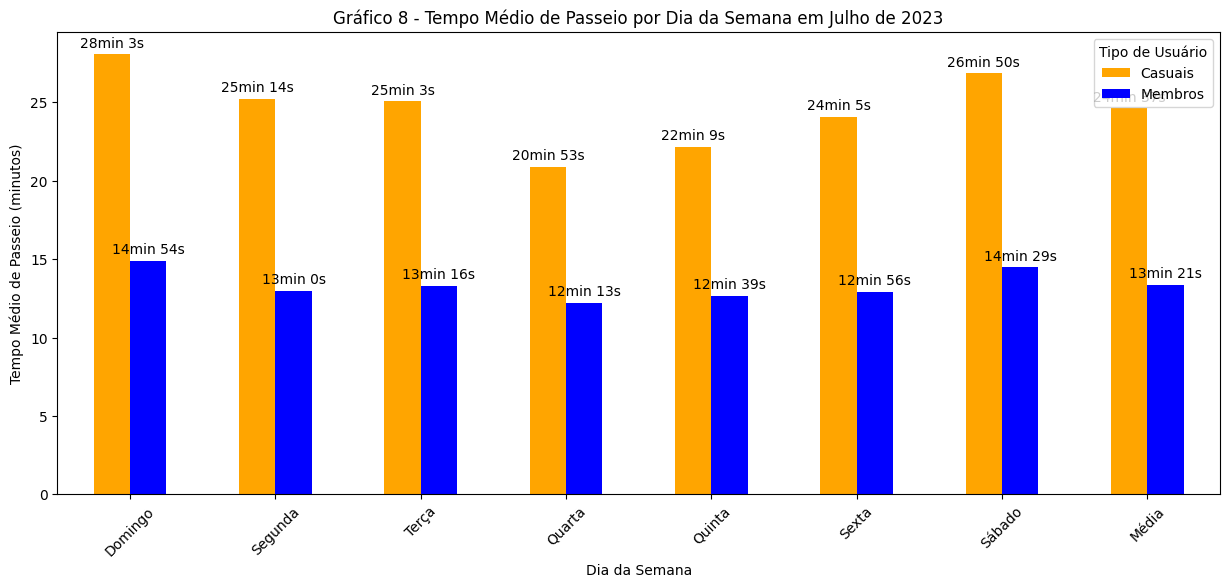


Dados do Tempo Médio de Passeio por Dia da Semana em Agosto de 2023:
member_casual     casual     member
day_week                           
Sunday         27min 27s  14min 58s
Monday         22min 45s  12min 18s
Tuesday         22min 8s  12min 47s
Wednesday      21min 52s  12min 49s
Thursday       21min 46s  12min 33s
Friday         24min 51s  13min 51s
Saturday       27min 42s  14min 52s
Average         24min 5s  13min 27s


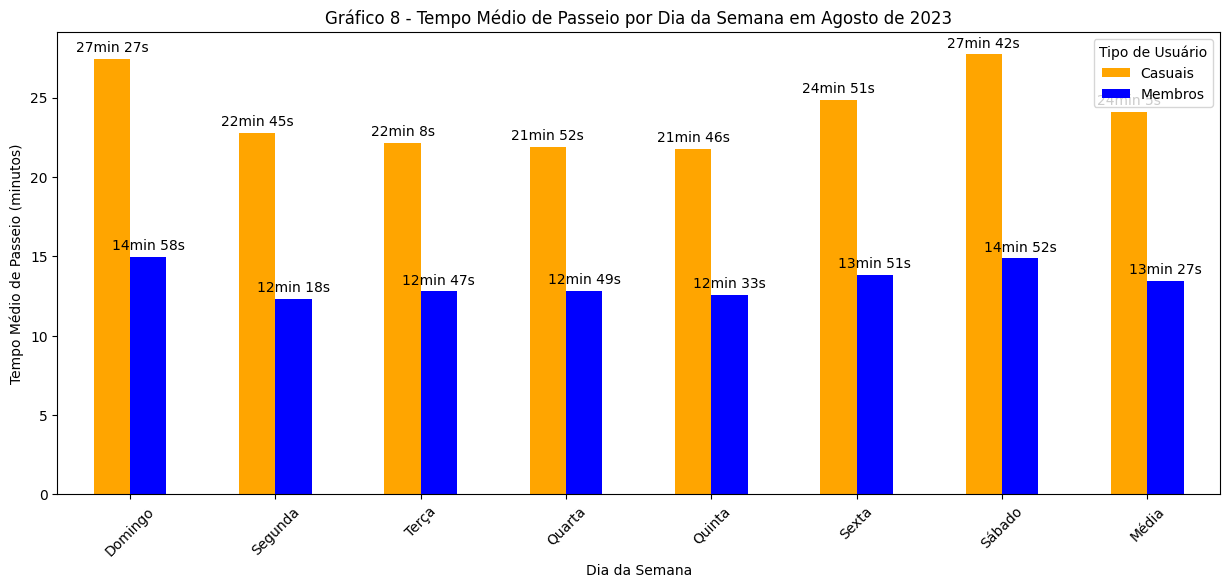


Dados do Tempo Médio de Passeio por Dia da Semana em Setembro de 2023:
member_casual     casual     member
day_week                           
Sunday         27min 10s  14min 20s
Monday         24min 18s   12min 5s
Tuesday        18min 31s  11min 40s
Wednesday      18min 43s  11min 58s
Thursday       19min 29s  11min 47s
Friday         22min 40s  12min 44s
Saturday       26min 26s   14min 6s
Average        22min 28s  12min 40s


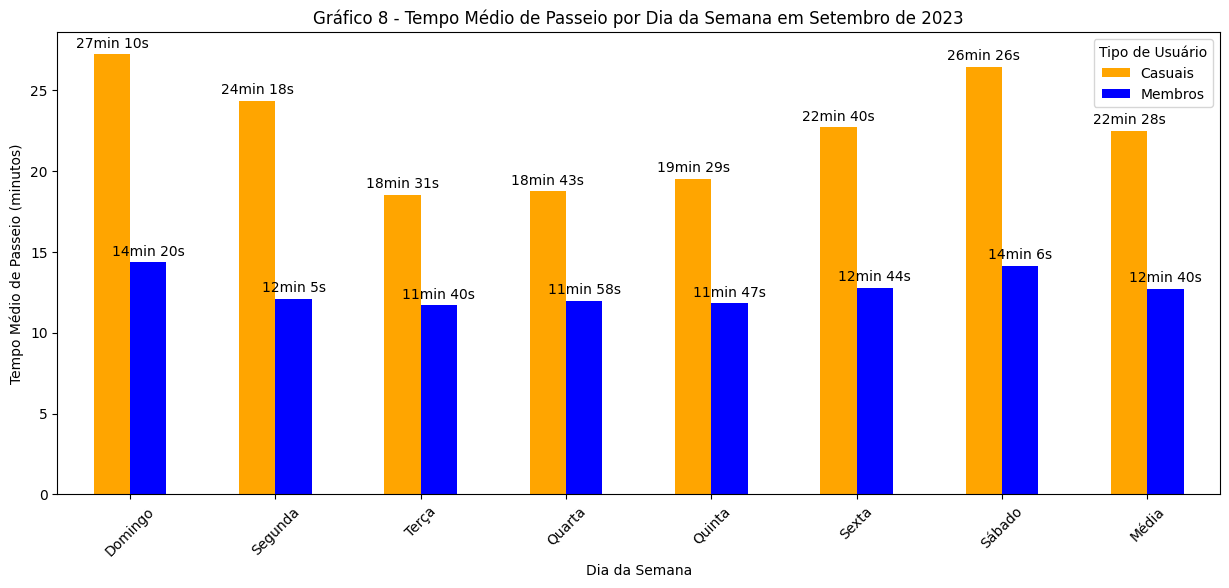


Dados do Tempo Médio de Passeio por Dia da Semana em Outubro de 2023:
member_casual     casual     member
day_week                           
Sunday         26min 42s   13min 5s
Monday         20min 25s  10min 58s
Tuesday        19min 24s  11min 33s
Wednesday      19min 30s  11min 30s
Thursday       17min 19s  11min 15s
Friday         19min 24s  11min 17s
Saturday       22min 46s  12min 18s
Average        20min 47s  11min 42s


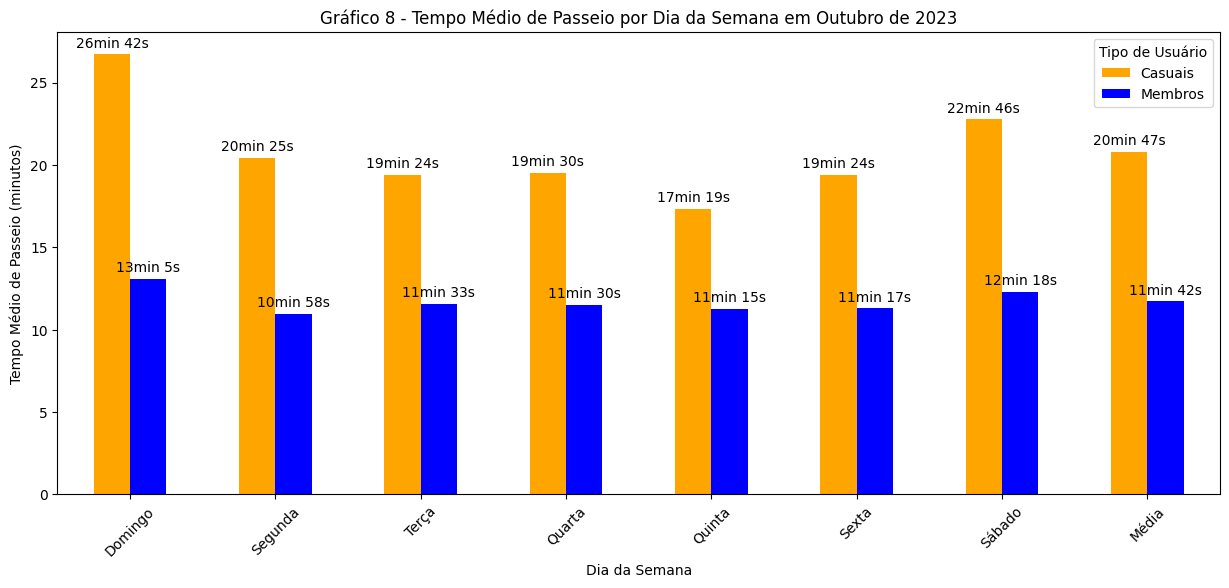


Dados do Tempo Médio de Passeio por Dia da Semana em Novembro de 2023:
member_casual     casual     member
day_week                           
Sunday         20min 56s  12min 32s
Monday         16min 10s  10min 43s
Tuesday        14min 21s  10min 20s
Wednesday      15min 16s  10min 42s
Thursday       16min 49s  10min 47s
Friday         17min 16s  10min 36s
Saturday       21min 41s  12min 37s
Average        17min 30s  11min 11s


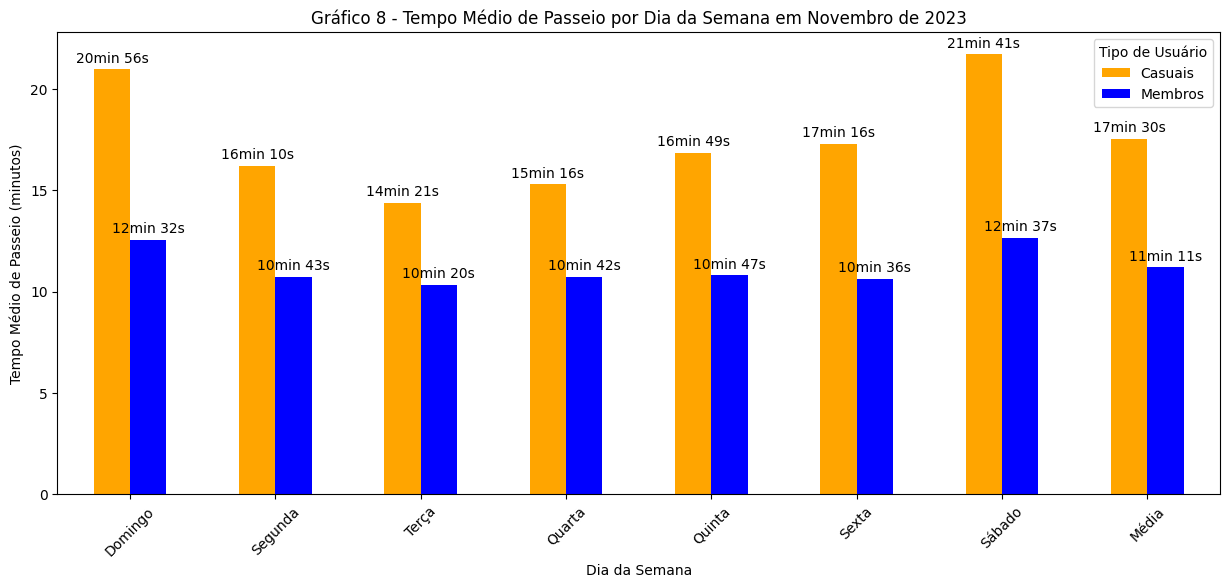


Dados do Tempo Médio de Passeio por Dia da Semana em Dezembro de 2023:
member_casual     casual     member
day_week                           
Sunday         19min 34s  11min 13s
Monday         15min 12s  10min 50s
Tuesday        13min 59s  10min 15s
Wednesday      15min 47s  10min 20s
Thursday       15min 12s   11min 1s
Friday          16min 4s  10min 57s
Saturday       18min 16s   11min 7s
Average        16min 18s  10min 49s


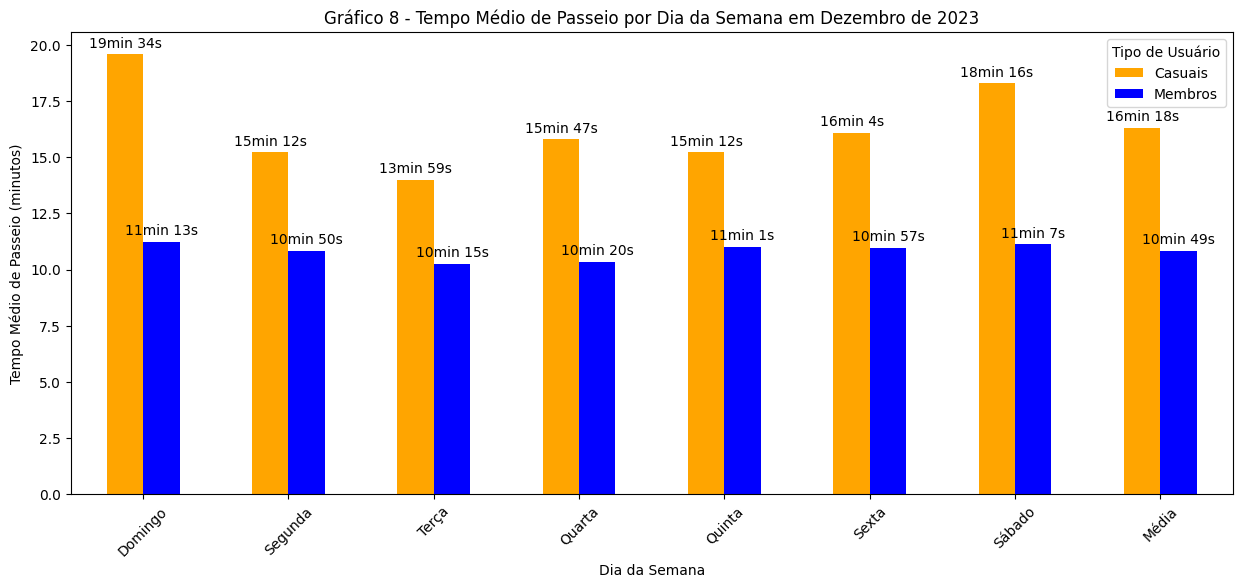

In [32]:
# Supondo que data_2023 já está definido e contém os dados de 2023
data_2023['mes'] = data_2023['started_at'].dt.month

nomes_dos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

def converter_para_minutos_segundos(minutos_decimais):
    """Converte um valor decimal de minutos para uma string de minutos e segundos."""
    minutos = int(minutos_decimais)
    segundos = int((minutos_decimais - minutos) * 60)
    return f"{minutos}min {segundos}s"

for mes in range(1, 13):
    dados_mes = data_2023[data_2023['mes'] == mes]
    tempo_medio_mes = dados_mes.groupby(['day_week', 'member_casual'])['duration_ride_minutos'].mean().unstack()
    tempo_medio_mes = tempo_medio_mes.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

    # Calculando a média para cada tipo de usuário e adicionando como nova linha "Average"
    media_casual = tempo_medio_mes['casual'].mean()
    media_member = tempo_medio_mes['member'].mean()
    tempo_medio_mes.loc['Average'] = [media_casual, media_member]

    # Convertendo valores para minutos e segundos, incluindo a média
    tempo_medio_mes_convertido = tempo_medio_mes.applymap(converter_para_minutos_segundos)

    # Exibindo os dados calculados
    print(f"\nDados do Tempo Médio de Passeio por Dia da Semana em {nomes_dos_meses[mes-1]} de 2023:")
    print(tempo_medio_mes_convertido)

    # Plotando o gráfico para o mês específico
    ax = tempo_medio_mes.plot(kind='bar', figsize=(15, 6), color=['orange', 'blue' ])
    plt.title(f'Gráfico 8 - Tempo Médio de Passeio por Dia da Semana em {nomes_dos_meses[mes-1]} de 2023')
    plt.xlabel('Dia da Semana')
    plt.ylabel('Tempo Médio de Passeio (minutos)')
    plt.xticks(ticks=range(8), labels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Média'], rotation=45)
    plt.legend(title='Tipo de Usuário', labels=['Casuais', 'Membros', 'Média'])

    # Adicionando rótulos de valores nas barras
    for i, p in enumerate(ax.patches):
        valor_original = tempo_medio_mes.iloc[i % len(tempo_medio_mes), i // len(tempo_medio_mes)]
        texto_rotulo = converter_para_minutos_segundos(valor_original)
        ax.annotate(texto_rotulo,
                    (p.get_x() + p.get_width() / 2., valor_original),
                    ha='center', va='bottom',
                    xytext=(0, 3),
                    textcoords='offset points')


    plt.show()

Top 10 estações para passeios casuais durante o ano de 2023

                                    casual  member  start_lat  start_lng
start_station_name                                                      
Streeter Dr & Grand Ave              43370   16244  41.892280 -87.612067
DuSable Lake Shore Dr & Monroe St    28714    9300  41.880981 -87.616764
Michigan Ave & Oak St                21098   13682  41.900968 -87.623763
Millennium Park                      18881    9229  41.881073 -87.624108
DuSable Lake Shore Dr & North Blvd   18774   14389  41.911713 -87.626817
Shedd Aquarium                       16953    4769  41.867236 -87.615422
Theater on the Lake                  15059   12980  41.926257 -87.630873
Dusable Harbor                       14548    5485  41.886970 -87.612827
Adler Planetarium                    11307    4841  41.866107 -87.607292
Montrose Harbor                      10906    7478  41.963965 -87.638193


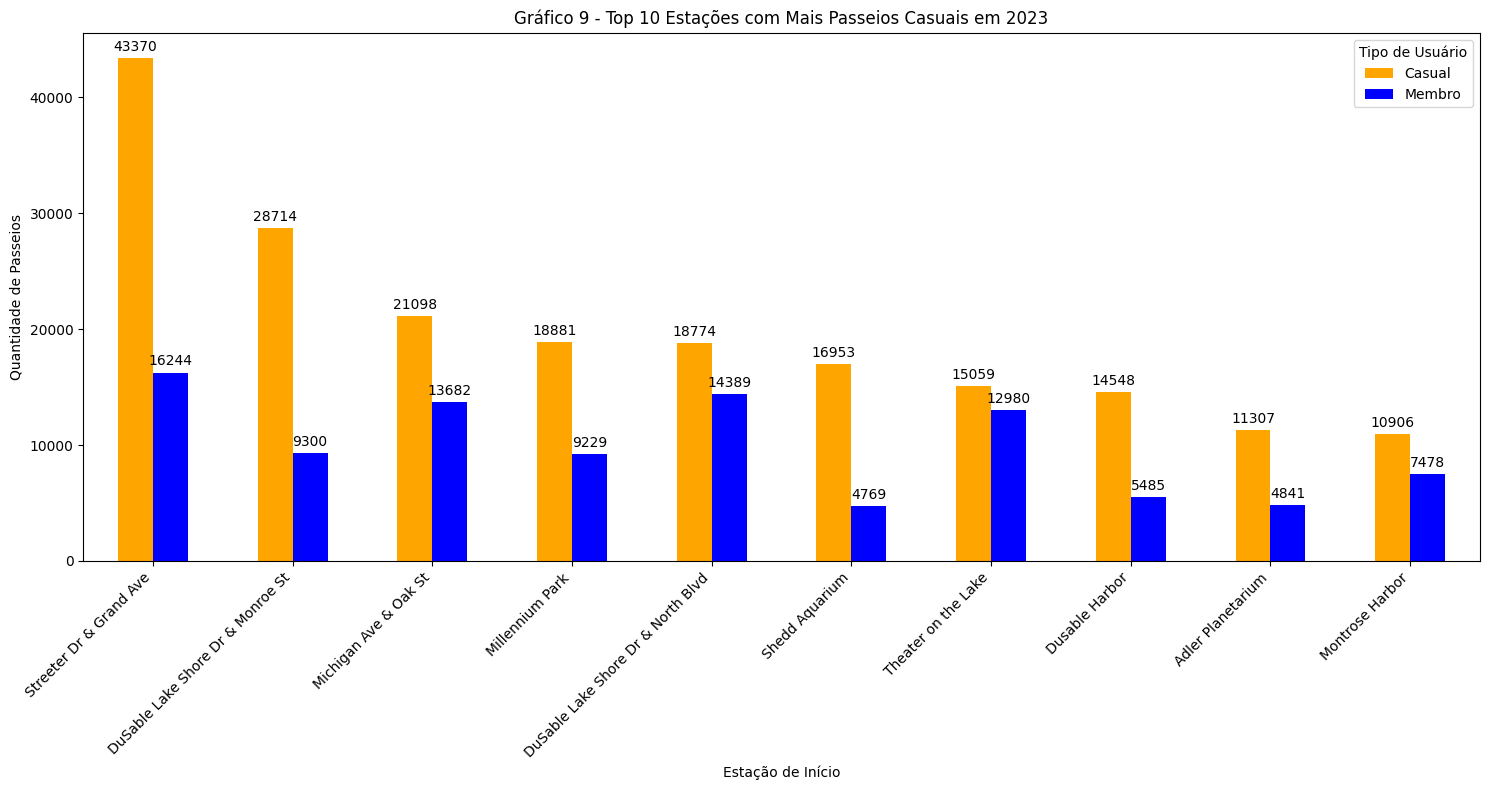

In [39]:
# Agrupando os dados por estação de início e tipo de usuário, contando os passeios
contagem_passeios_por_estacao = data_2023_result.groupby(['start_station_name', 'member_casual']).size().unstack(fill_value=0)

# Agregando coordenadas médias de latitude e longitude para cada estação
coordenadas = data_2023_result.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean'})

# Juntando as contagens de passeios com as coordenadas
contagem_passeios_por_estacao = contagem_passeios_por_estacao.join(coordenadas)

# Ordenando as estações pela quantidade de passeios casuais e pegando as top 10
top_estacoes = contagem_passeios_por_estacao.sort_values(by='casual', ascending=False).head(10)

# Imprimindo os dados das top 10 estações com latitude e longitude
print(top_estacoes[['casual', 'member', 'start_lat', 'start_lng']])

# Criando o gráfico
ax = top_estacoes[['casual', 'member']].plot(kind='bar', figsize=(15, 8), color=['orange', 'blue'])
ax.set_title('Gráfico 9 - Top 10 Estações com Mais Passeios Casuais em 2023')
ax.set_xlabel('Estação de Início')
ax.set_ylabel('Quantidade de Passeios')
ax.legend(title='Tipo de Usuário', labels=['Casual', 'Membro'])

# Adicionando rótulos com a quantidade de passeios em cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.xticks(rotation=45, ha='right', ticks=range(len(top_estacoes)), labels=top_estacoes.index)
plt.tight_layout()
plt.show()

# Cria um mapa centrado na média das coordenadas das top 10 estações
mapa = folium.Map(location=[top_estacoes['start_lat'].mean(), top_estacoes['start_lng'].mean()], zoom_start=15)

# Adiciona marcadores para cada uma das top 10 estações
for index, estacao in top_estacoes.iterrows():
    folium.Marker(
        location=[estacao['start_lat'], estacao['start_lng']],
        popup=f"{index}: Casual - {estacao['casual']}, Member - {estacao['member']}",
        tooltip=index
    ).add_to(mapa)

# Exibe o mapa diretamente no notebook do Colab
mapa


Top 10 estações para passeios de membros durante o ano de 2023

Top 10 Estações com Mais Passeios de Membros em 2023:
                              member  casual  start_lat  start_lng
start_station_name                                                
Clinton St & Washington Blvd   24299    5925  41.883390 -87.641243
Kingsbury St & Kinzie St       24214    8090  41.889182 -87.638510
Clark St & Elm St              23079    9888  41.902919 -87.631388
Wells St & Concord Ln          19220   10825  41.912094 -87.634729
Clinton St & Madison St        19110    5609  41.882590 -87.641203
Wells St & Elm St              18512    8997  41.903172 -87.634431
University Ave & 57th St       18061    5899  41.791479 -87.599875
Loomis St & Lexington St       17816    2705  41.872229 -87.661366
Ellis Ave & 60th St            16979    6587  41.785101 -87.601079
Broadway & Barry Ave           16809    8177  41.937603 -87.644104


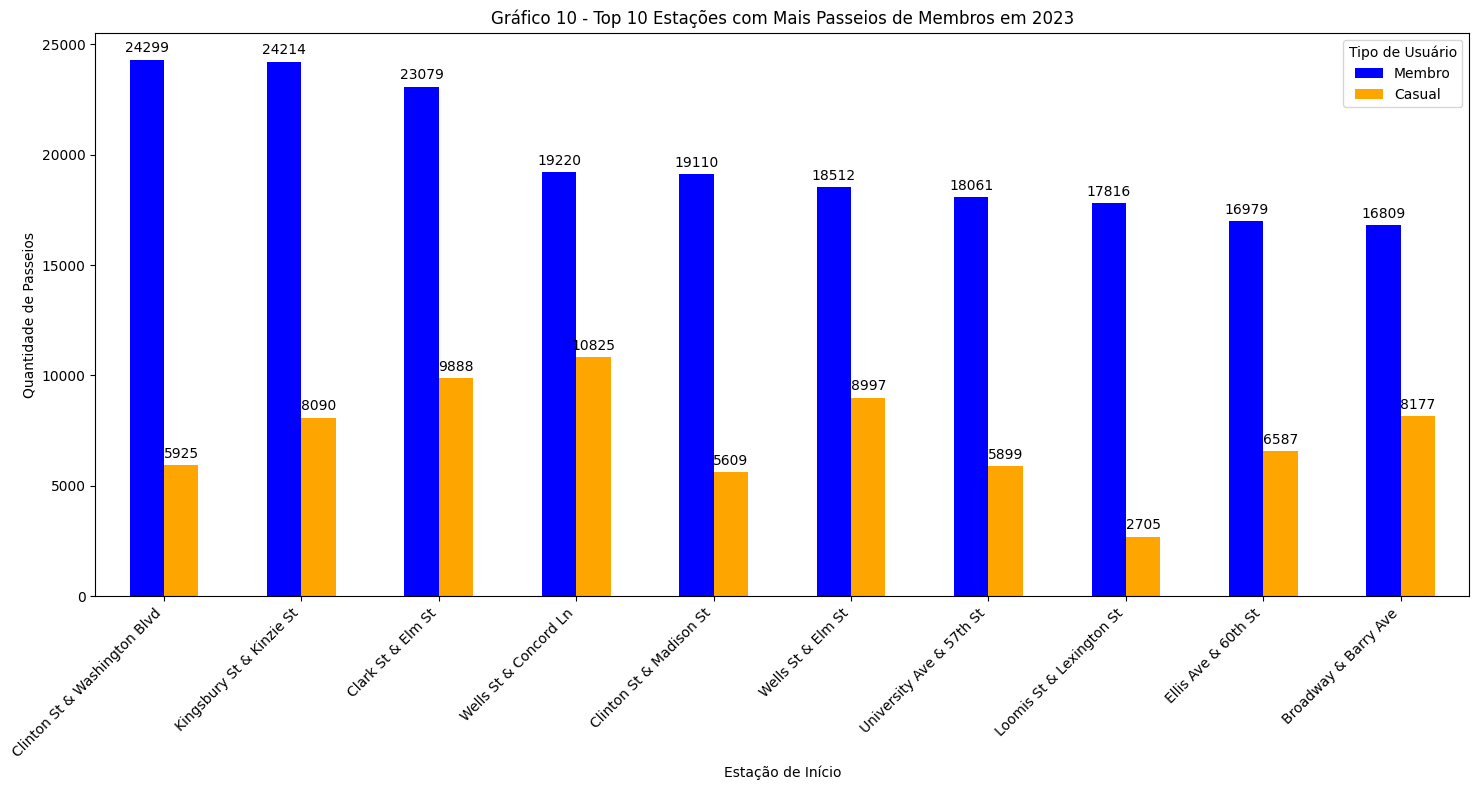

In [40]:
# Agrupando os dados por estação de início e tipo de usuário, contando os passeios
contagem_passeios_por_estacao = data_2023_result.groupby(['start_station_name', 'member_casual']).size().unstack(fill_value=0)

# Agregando coordenadas médias de latitude e longitude para cada estação
coordenadas = data_2023_result.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean'})

# Juntando as contagens de passeios com as coordenadas
contagem_passeios_por_estacao = contagem_passeios_por_estacao.join(coordenadas)

# Ordenando as estações pela quantidade de passeios de membros e pegando as top 10
top_estacoes_membros = contagem_passeios_por_estacao.sort_values(by='member', ascending=False).head(10)

# Imprimindo os dados das top 10 estações com latitude e longitude para membros
print("Top 10 Estações com Mais Passeios de Membros em 2023:")
print(top_estacoes_membros[['member', 'casual', 'start_lat', 'start_lng']])

# Criando o gráfico para membros
ax_membros = top_estacoes_membros[['member', 'casual']].plot(kind='bar', figsize=(15, 8), color=['blue', 'orange'])
ax_membros.set_title('Gráfico 10 - Top 10 Estações com Mais Passeios de Membros em 2023')
ax_membros.set_xlabel('Estação de Início')
ax_membros.set_ylabel('Quantidade de Passeios')
ax_membros.legend(title='Tipo de Usuário', labels=['Membro', 'Casual'])

# Adicionando rótulos com a quantidade de passeios em cada barra para membros
for p in ax_membros.patches:
    ax_membros.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.xticks(rotation=45, ha='right', ticks=range(len(top_estacoes_membros)), labels=top_estacoes_membros.index)
plt.tight_layout()
plt.show()


# Cria um mapa centrado na média das coordenadas das top 10 estações de membros
mapa_membros = folium.Map(location=[top_estacoes_membros['start_lat'].mean(), top_estacoes_membros['start_lng'].mean()], zoom_start=13)

# Adiciona marcadores para cada uma das top 10 estações de membros
for index, row in top_estacoes_membros.iterrows():
    popup_text = f"{index}: Membros - {row['member']}, Casuais - {row['casual']}"
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=popup_text,
        tooltip=index
    ).add_to(mapa_membros)

# Exibe o mapa diretamente no notebook do Colab
mapa_membros

## **Analise dos insights de dados**


No tempo medio de passeio, o casual roda muito mais que o membro, com 22:56s contra 12:07s durante o ano (grafico 1), no decorrer dos meses o clima afetada, com o tempo de passeio diminuindo no inverno e aumentando durante o verao, mas ha que se salientar que a variacao de tempo de passeio para membros nao é tao grande mesmo no inverno (grafico 2).

Ja na quantidade de passeio os passeios, os passeios de membros tem 29,28% a mais que os passeios casuais durante o ano (grafico 3). No passar dos meses, vemos a distancia da quantidade de passeios durante o inverno aumentar, e no verao a distancia dimimui (grafico 4).

Quanto a quantidade de passeios com relação aos dias de semana, temos uma aproximacao dos passeios casuais em relacao ao membros no final de semana, e um distanciamento da quantidade de passeios durante os dias da semana(grafico 5), com relaçao aos meses vemos uma dissiparidade com relaçao ao verao, quando a quantidade de passeios se aproxima entre membros e casual (grafico 6).

Com relação ao tempo de passeio x dias de semana para membros e casuais, novamente o tempo de passeio dos casuais é bem superior durante toda a semana, sendo os maiores periodos no fim de semana (grafico 7), mas durante os meses, no inverno o tempo de passeio casuais diminui drasticamente, nao há muitas variacoes para os membros(grafico 8).

Tambem foi realizado uma analise quais principais estacoes é iniciados os passeios. Para os passeios casuais, a principais estações estao em areas turisticas ao redor do lake michigan(grafico 9). Já para o passeio de membros o top 1 é numa regiao de empresas e comercios no downtown de Chicago .


### Questionamentos respondidos pela analise

1. Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?

Resposta = Resumidamente, passeios casuais sao na regiao turisticas, sao em maior quantidade nos fim de semana e nos periodos de calor, com periodo de passeio com quase o dobro de tempo em relaçao ao membros que fazem mais passeios no downtown, durante os dias da semana e com periodos de 15 minutos de passeio na media


2. Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?

Resposta =  Iriam adquirir por causa do tempo que fazem passeios que é muito maior que os membros, indicando que os passageiros casuais aparentemente gostam de passear pela cidade, principalmente pelos pontos turisticos.

3. Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

Resposta = Fazendo acordos com a midia  com os pontos turisticos e as estações de metro com a maior concentração de usuarios casual, porque estacaoes de trem pois para sair do downtown de Chicago e chegar na area do Lake Michigan eles precisam chegar muitas vezes de metro, e a maior concentraçao de passeios estao nestas areas, consequentemente o publico alvo é atingido.
Tambem faria uma aumento de disparo de anuncio nas midias digitais durante o final de semana e no verao, que é onde tem mais passageiros casuais.
